Malicious DNS to TCP Supervised classification.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
cols = [ 
        "SourcePort", #Port numbers associated with the source endpoints of the network flow.
        "DestinationPort", #Port numbers associated with the destination endpoints of the network flow.
        "Duration", #Duration of the network flow.
        "FlowBytesSent", #Number of bytes sent in the network flow.
        "FlowSentRate", #Rate at which bytes are sent in the network flow.
        "FlowBytesReceived", #Number of bytes received in the network flow.
        "FlowReceivedRate", #Rate at which bytes are received in the network flow.
        "PacketTimeCoefficientofVariation", #Calculates the coefficient of variation for the time intervals between packets in a data communication or networking context.
        "ResponseTimeTimeVariance", #Calculates the variance of response times in a system or application.
        "ResponseTimeTimeStandardDeviation", #Calculates the standard deviation of response times in a system or application. 
        "ResponseTimeTimeMean",#Calculates the mean (average) of response times in a system or application.
        "ResponseTimeTimeMedian", #Calculates the median of response times in a system or application.
        "ResponseTimeTimeMode", #Calculates the mode of response times in a system or application.
        "ResponseTimeTimeSkewFromMedian",#calculates the skewness of response times in relation to the median in a system or application, where skewness is a statistical measure that indicates the asymmetry of a probability distribution.
        "ResponseTimeTimeSkewFromMode", #Measurement of how the distribution of response times is skewed in relation to the mode which is the most frequently occurring value in a dataset.
        "ResponseTimeTimeCoefficientofVariation", #Useful for understanding how consistent or variable the system's response times are.
        "DoH" #DoH stands for DNS over HTTPS and is a protocol that enhances the security and privacy of DNS (Domain Name System) queries by encrypting the DNS traffic and sending it over the HTTPS protocol.
        ]
df = pd.read_csv("Malicious DNS to TCP.csv")
df.head()


SourceIP   DestinationIP  SourcePort  DestinationPort  \
0  192.168.20.209         1.1.1.1       39406              443   
1         1.1.1.1  192.168.20.209         443            39406   
2         1.1.1.1  192.168.20.209         443            39406   
3         1.1.1.1  192.168.20.209         443            39406   
4         1.1.1.1  192.168.20.209         443            39406   

             TimeStamp    Duration  FlowBytesSent  FlowSentRate  \
0  2020-04-01 22:55:13  120.772871          42357    350.716180   
1  2020-04-01 22:57:14  120.656643          78950    654.336123   
2  2020-04-01 22:59:15  120.692061          78559    650.904453   
3  2020-04-01 23:01:15  120.644016          78133    647.632619   
4  2020-04-01 23:03:16  120.883686          79169    654.918812   

   FlowBytesReceived  FlowReceivedRate  ...  PacketTimeCoefficientofVariation  \
0              71915        595.456574  ...                          0.489724   
1              46138        382.390881  ...                          0.617101   
2              46805        387.805127  ...                          0.617322   
3              46444        384.967291  ...                          0.608922   
4              47193        390.400074  ...                          0.615777   

   ResponseTimeTimeVariance  ResponseTimeTimeStandardDeviation  \
0              4.023502e-01                           0.634311   
1              1.243765e-08                           0.000112   
2              8.999716e-09                           0.000095   
3              7.678121e-09                           0.000088   
4              1.310879e-08                           0.000114   

   ResponseTimeTimeMean  ResponseTimeTimeMedian  ResponseTimeTimeMode  \
0              0.163861                0.001734              0.000006   
1              0.000050                0.000034              0.000021   
2              0.000046                0.000031              0.000024   
3              0.000048                0.000035              0.000021   
4              0.000048                0.000030              0.000018   

   ResponseTimeTimeSkewFromMedian  ResponseTimeTimeSkewFromMode  \
0                        0.766785                      0.258319   
1                        0.433249                      0.260983   
2                        0.471856                      0.231073   
3                        0.444360                      0.307892   
4                        0.470369                      0.261599   

   ResponseTimeTimeCoefficientofVariation   DoH  
0                                3.871039  True  
1                                2.225769  True  
2                                2.065863  True  
3                                1.826318  True  
4                                2.387701  True  

[5 rows x 35 columns]

In [3]:
#The code takes the values in the "DoH" column of the DataFrame df, attempts to convert them into integers, and then assigns the resulting integers to the "FlowBytesReceived" column for example
df["FlowBytesReceived"] = df["DoH"].astype(int)

In [4]:
df.head()

SourceIP   DestinationIP  SourcePort  DestinationPort  \
0  192.168.20.209         1.1.1.1       39406              443   
1         1.1.1.1  192.168.20.209         443            39406   
2         1.1.1.1  192.168.20.209         443            39406   
3         1.1.1.1  192.168.20.209         443            39406   
4         1.1.1.1  192.168.20.209         443            39406   

             TimeStamp    Duration  FlowBytesSent  FlowSentRate  \
0  2020-04-01 22:55:13  120.772871          42357    350.716180   
1  2020-04-01 22:57:14  120.656643          78950    654.336123   
2  2020-04-01 22:59:15  120.692061          78559    650.904453   
3  2020-04-01 23:01:15  120.644016          78133    647.632619   
4  2020-04-01 23:03:16  120.883686          79169    654.918812   

   FlowBytesReceived  FlowReceivedRate  ...  PacketTimeCoefficientofVariation  \
0                  1        595.456574  ...                          0.489724   
1                  1        382.390881  ...                          0.617101   
2                  1        387.805127  ...                          0.617322   
3                  1        384.967291  ...                          0.608922   
4                  1        390.400074  ...                          0.615777   

   ResponseTimeTimeVariance  ResponseTimeTimeStandardDeviation  \
0              4.023502e-01                           0.634311   
1              1.243765e-08                           0.000112   
2              8.999716e-09                           0.000095   
3              7.678121e-09                           0.000088   
4              1.310879e-08                           0.000114   

   ResponseTimeTimeMean  ResponseTimeTimeMedian  ResponseTimeTimeMode  \
0              0.163861                0.001734              0.000006   
1              0.000050                0.000034              0.000021   
2              0.000046                0.000031              0.000024   
3              0.000048                0.000035              0.000021   
4              0.000048                0.000030              0.000018   

   ResponseTimeTimeSkewFromMedian  ResponseTimeTimeSkewFromMode  \
0                        0.766785                      0.258319   
1                        0.433249                      0.260983   
2                        0.471856                      0.231073   
3                        0.444360                      0.307892   
4                        0.470369                      0.261599   

   ResponseTimeTimeCoefficientofVariation   DoH  
0                                3.871039  True  
1                                2.225769  True  
2                                2.065863  True  
3                                1.826318  True  
4                                2.387701  True  

[5 rows x 35 columns]

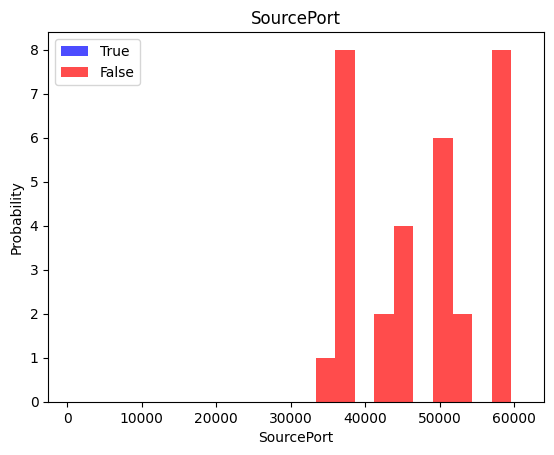

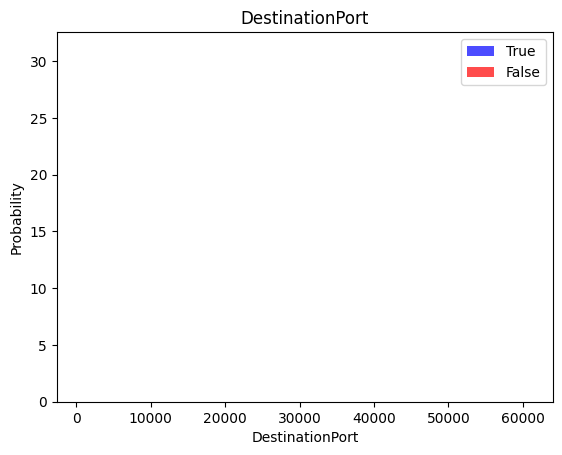

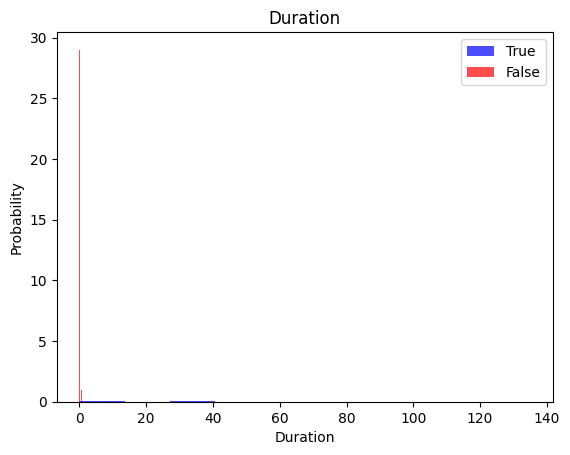

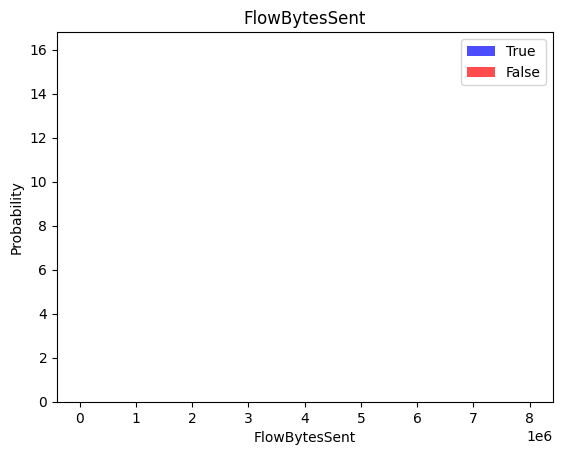

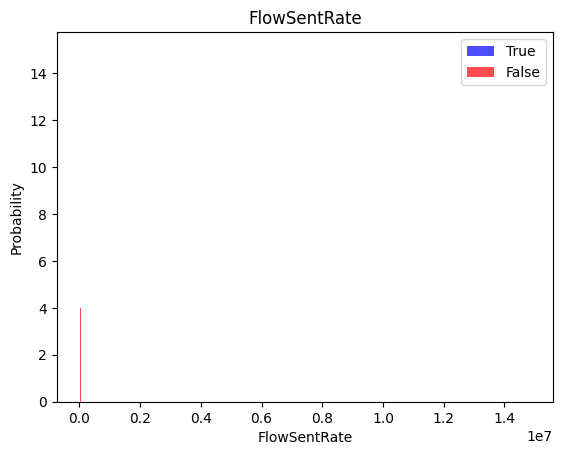

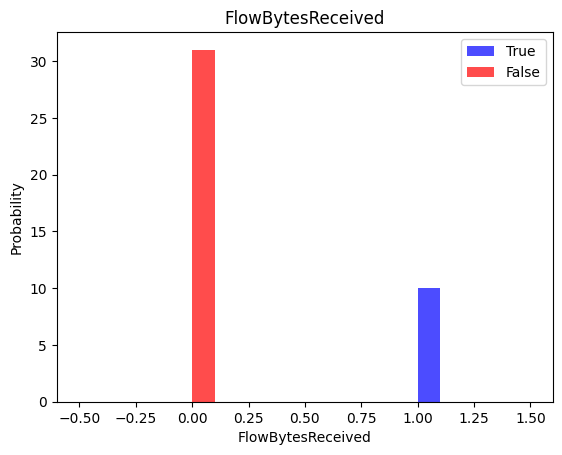

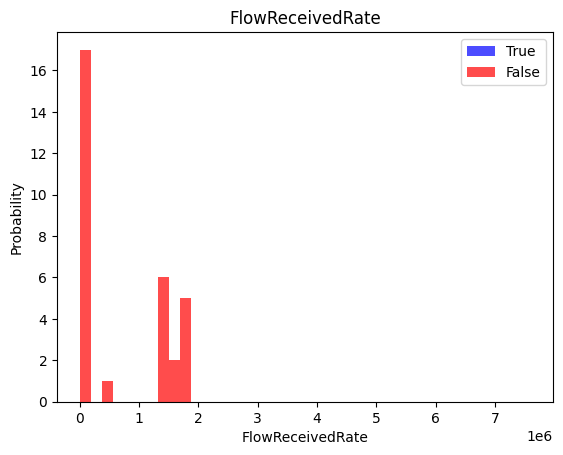

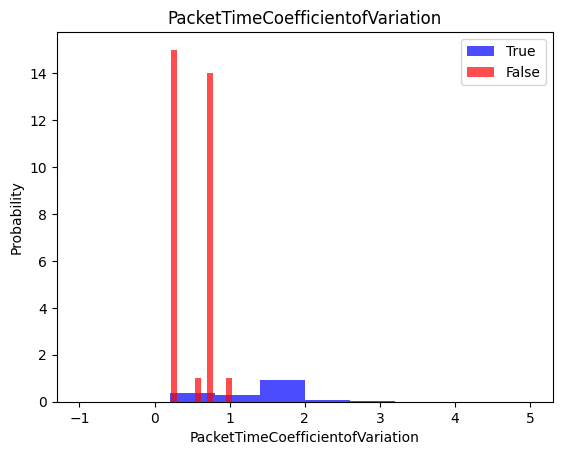

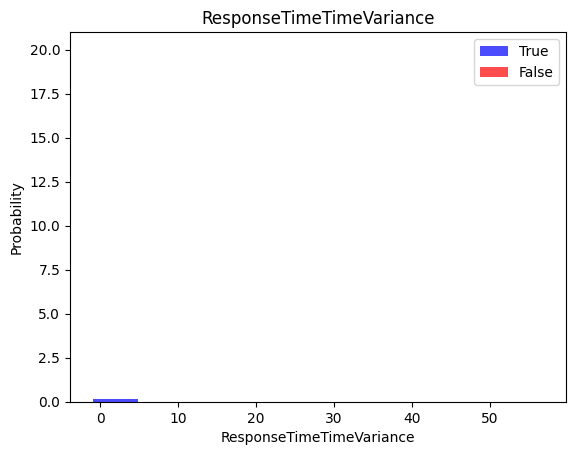

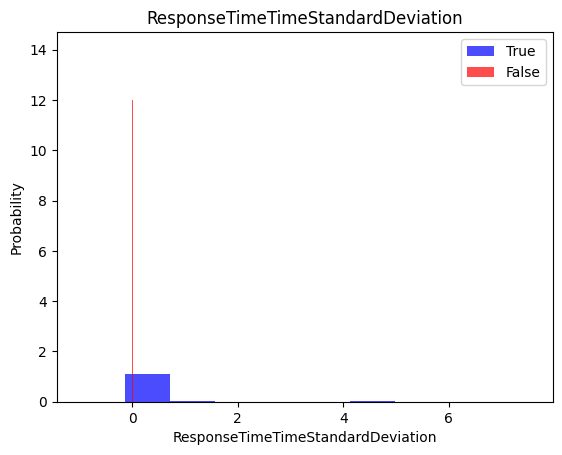

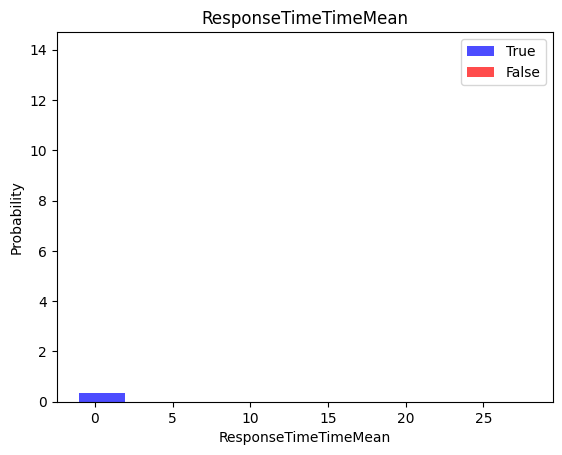

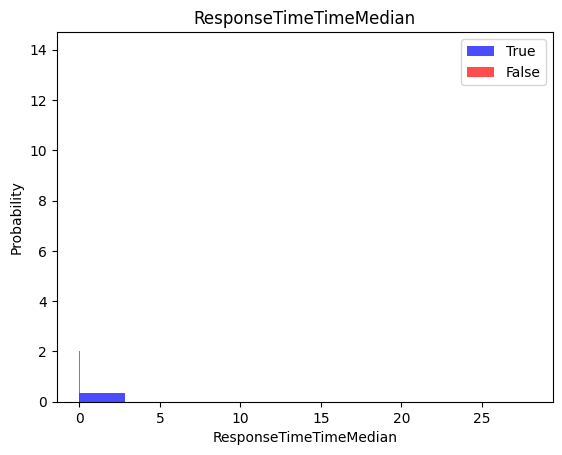

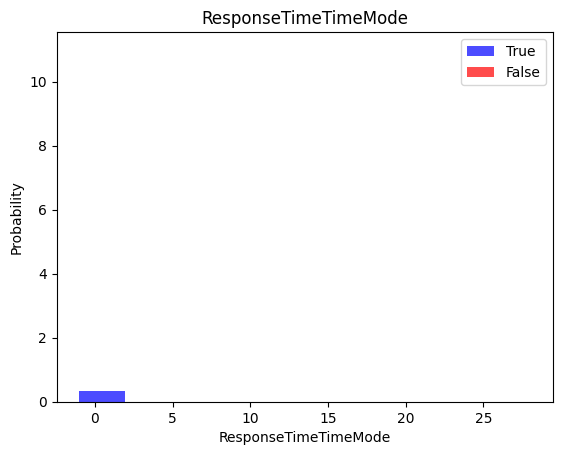

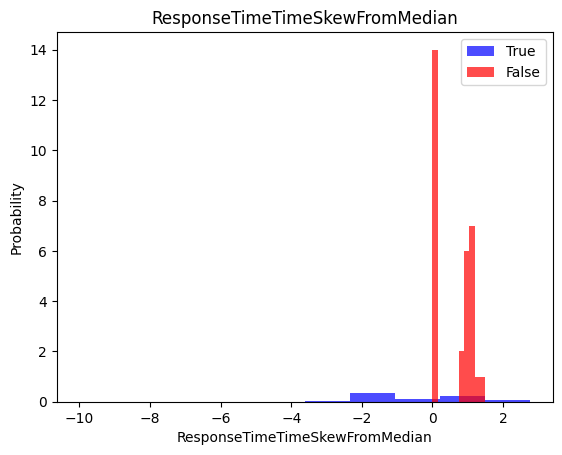

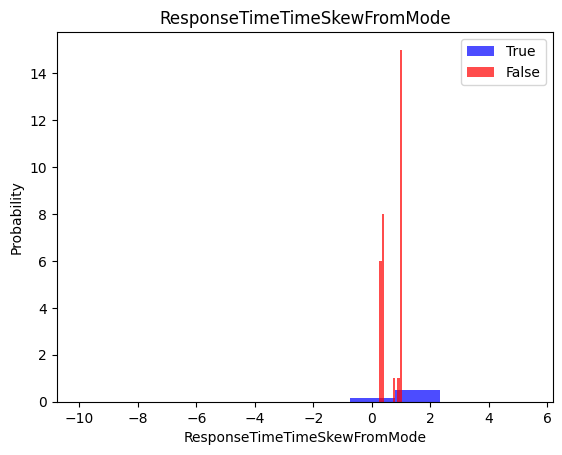

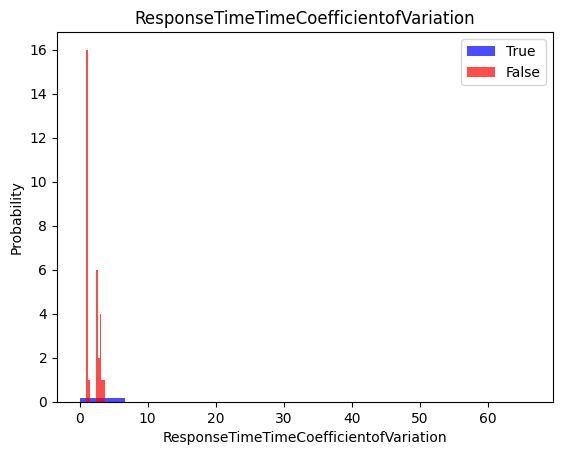

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["FlowBytesReceived"]==1][label], color='blue', label='True', alpha=0.7, density=True)
    plt.hist(df[df["DoH"]==0][label], color='red', label='False', alpha=0.7, density=False)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [6]:
#Shuffles the rows of the DataFrame df and then splitting it into three sets: a training set containing approximately the first 60% of rows, a validation set containing the next 20% of rows, and a test set containing the remaining 20% of rows.
#This technique is commonly used in machine learning to create separate data subsets for training, tuning model parameters, and evaluating model performance.
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False): #Defines the function 
    X = dataframe.drop(columns=['DoH', 'TimeStamp', 'SourceIP', 'DestinationIP']).values #Extracts the feature matrix X from the input DataFrame by dropping the specified columns, and converts the remaining data into a NumPy array.
    y = dataframe['DoH'].values #Extracts the target vector y from the input DataFrame whilst selecting the values from the 'DoH' column and converts them into a NumPy array.

    scaler = StandardScaler()#Creates an instance of the StandardScaler class from the scikit-learn library, where the StandardScaler is used to standardize the feature matrix by centering and scaling the features.
    X = scaler.fit_transform(X)#This means that the features will be standardized (centered around zero with unit variance) using the mean and standard deviation of each feature.

    if oversample: #This conditional block checks if the oversample flag is True.
        ros = RandomOverSampler() #Used for oversampling the dataset to balance class distribution.
        X, y = ros.fit_resample(X, y) #The feature matrix X and target vector y are oversampled using the fit_resample() method of the RandomOverSampler instance.

    return X, y#Returns the scaled and optionally oversampled feature matrix X along with the corresponding target vector y.

In [8]:
train_X, train_y = scale_dataset(train, oversample=True) #This line calls the function with the dataset and sets the returned values to train_x and train_y
valid_X, valid_y = scale_dataset(valid, oversample=False) #Calls the scale_dataset function with the valid dataset and sets the returned values to valid_X and valid_y.
test_X, test_y = scale_dataset(test, oversample=False) #Calls the scale_dataset function with the test dataset and sets the returned values to test_X and test_y.

In [9]:
#Imputes missing values in the train_X and test_X datasets using the mean value imputation strategy using the SimpleImputer class to perform this task, to ensure that the datasets have complete data before being used for training or testing machine learning models.
imputer = SimpleImputer(strategy='mean')
train_X_imputed = imputer.fit_transform(train_X)
test_X_imputed = imputer.transform(test_X)

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5) #The parameter n_neighbors is set to 5 indicating that the model will consider the 5 nearest neighbors when making predictions.
knn_model.fit(train_X_imputed, train_y) #This line trains the KNN classifier using the training data, where he KNN model learns the patterns in the training data in order to make predictions based on the neighbors of the data points.

KNeighborsClassifier()

In [11]:
#Uses a trained KNN classifier to predict the labels or classes for the test dataset features stored in test_X_imputed. 
# The predicted labels are then stored in the variable y_pred which can be used for further analysis or evaluation of the model's performance on the test data.
y_pred = knn_model.predict(test_X_imputed)

In [12]:
#Generates and prints a classification report providing detailed insights into how well a classification model's predictions match the actual classes in the test dataset. 
#This report is useful for evaluating the model's performance and understanding its strengths and weaknesses in terms of different classes.
print(classification_report(test_y, y_pred))


#The below output indicates that the model has achieved high precision, recall, and F1-score for both classes ("False" and "True") where the accuracy of the model is also very high (1.00 or 100%). 
#These metrics suggest that the model's predictions match the actual classes in the dataset very well.


              precision    recall  f1-score   support

       False       0.80      1.00      0.89         4
        True       1.00      1.00      1.00     33500

    accuracy                           1.00     33504
   macro avg       0.90      1.00      0.94     33504
weighted avg       1.00      1.00      1.00     33504



In [13]:
nb_model = GaussianNB() #A probabilistic classification algorithm that makes predictions based on the probabilities of different features belonging to each class. 
nb_model = nb_model.fit(train_X_imputed, train_y) #Learns the underlying probabilistic distributions of the features in relation to the target classes.

In [14]:
y_pred = nb_model.predict(test_X_imputed) #Applies the trained Gaussian Naive Bayes classifier to the feature matrix, as the predict() method is used to make predictions on the test data where the resulting predictions are stored in the variable y_pred.
print(classification_report(test_y, y_pred)) #Generates a comprehensive report on the classification performance of the Gaussian Naive Bayes classifier's predictions.

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         4
        True       1.00      1.00      1.00     33500

    accuracy                           1.00     33504
   macro avg       1.00      1.00      1.00     33504
weighted avg       1.00      1.00      1.00     33504



In [15]:
lg_model = LogisticRegression() #Logistic regression is a commonly used algorithm for binary classification tasks, where the goal is to predict one of two possible classes.
lg_model = lg_model.fit(train_X_imputed, train_y) #Trains the logistic regression classifier using the training data.

In [16]:
y_pred = lg_model.predict(test_X_imputed)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         4
        True       1.00      1.00      1.00     33500

    accuracy                           1.00     33504
   macro avg       1.00      1.00      1.00     33504
weighted avg       1.00      1.00      1.00     33504



In [17]:
svm_model = SVC() #Creates an instance of the SVC class to represents a Support Vector Machine classifier, which are powerful machine learning models used for both classification and regression tasks.
svm_model = svm_model.fit(train_X_imputed, train_y)#Trains the SVM classifier using the training data. 

In [18]:
y_pred = svm_model.predict(test_X_imputed)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         4
        True       1.00      1.00      1.00     33500

    accuracy                           1.00     33504
   macro avg       1.00      1.00      1.00     33504
weighted avg       1.00      1.00      1.00     33504



In [19]:
def plot_history(history): #This line defines a function named plot_history that takes a single argument, where the history object is usually obtained after training a neural network model.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #Creates a figure and two subplots (panels) arranged side by side.
  ax1.plot(history.history['loss'], label='loss') #Plots the training loss values stored in the history object, also labeling the line as "loss".
  ax1.plot(history.history['val_loss'], label='val_loss') #Plots the validation loss values stored in the history object, which also labels the line as "val_loss".
  ax1.set_xlabel('Epoch') #Sets the x-axis label for the first subplot.
  ax1.set_ylabel('Binary crossentropy') #Sets the y-axis label for the first subplot.
  ax1.grid(True) #Adds a grid to the first subplot.

  ax2.plot(history.history['accuracy'], label='accuracy') #Plots the training accuracy values stored in the history object, also labeling the line as "accuracy".
  ax2.plot(history.history['val_accuracy'], label='val_accuracy') #Plots the validation accuracy values stored in the history object, also labeling the line as "val_accuracy".
  ax2.set_xlabel('Epoch') #Sets the x-axis label for the second subplot.
  ax2.set_ylabel('Accuracy') #Sets the y-axis label for the second subplot.
  ax2.grid(True) #Adds a grid to the second subplot.

In [20]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs): #Defines a function takes several arguments
  nn_model = tf.keras.Sequential([ #Defines a sequential neural network model using Keras. 
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(31,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', #Compiles the neural network model specifying the optimizer, the loss function, and the metrics to track during training.
                  metrics=['accuracy'])
  history = nn_model.fit( #Trains the compiled neural network model using the training data.
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history #Returns both the trained neural network model and the training history.

16 nodes, dropout 0, lr 0.01, batch size 32
1047/1047 [==============================] - 1s 586us/step - loss: nan - accuracy: 0.9991
16 nodes, dropout 0, lr 0.01, batch size 64
1047/1047 [==============================] - 1s 581us/step - loss: nan - accuracy: 0.9991
16 nodes, dropout 0, lr 0.01, batch size 128
1047/1047 [==============================] - 1s 582us/step - loss: nan - accuracy: 0.9991
16 nodes, dropout 0, lr 0.005, batch size 32
1047/1047 [==============================] - 1s 590us/step - loss: nan - accuracy: 0.9991
16 nodes, dropout 0, lr 0.005, batch size 64
1047/1047 [==============================] - 1s 585us/step - loss: nan - accuracy: 0.9991
16 nodes, dropout 0, lr 0.005, batch size 128
1047/1047 [==============================] - 1s 636us/step - loss: nan - accuracy: 0.9991
16 nodes, dropout 0, lr 0.001, batch size 32
1047/1047 [==============================] - 1s 608us/step - loss: nan - accuracy: 0.9991
16 nodes, dropout 0, lr 0.001, batch size 64
1047/1047 [

C:\Users\marty\AppData\Local\Temp\ipykernel_8200\3234991413.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #Creates a figure and two subplots (panels) arranged side by side.


1047/1047 [==============================] - 1s 553us/step - loss: nan - accuracy: 0.9991
32 nodes, dropout 0, lr 0.005, batch size 32
1047/1047 [==============================] - 1s 543us/step - loss: nan - accuracy: 0.9991
32 nodes, dropout 0, lr 0.005, batch size 64
1047/1047 [==============================] - 1s 565us/step - loss: nan - accuracy: 0.9991
32 nodes, dropout 0, lr 0.005, batch size 128
1047/1047 [==============================] - 1s 556us/step - loss: nan - accuracy: 0.9991
32 nodes, dropout 0, lr 0.001, batch size 32
1047/1047 [==============================] - 1s 567us/step - loss: nan - accuracy: 0.9991
32 nodes, dropout 0, lr 0.001, batch size 64
1047/1047 [==============================] - 1s 584us/step - loss: nan - accuracy: 0.9991
32 nodes, dropout 0, lr 0.001, batch size 128
1047/1047 [==============================] - 1s 586us/step - loss: nan - accuracy: 0.9991
32 nodes, dropout 0.2, lr 0.01, batch size 32
1047/1047 [==============================] - 1s 674u

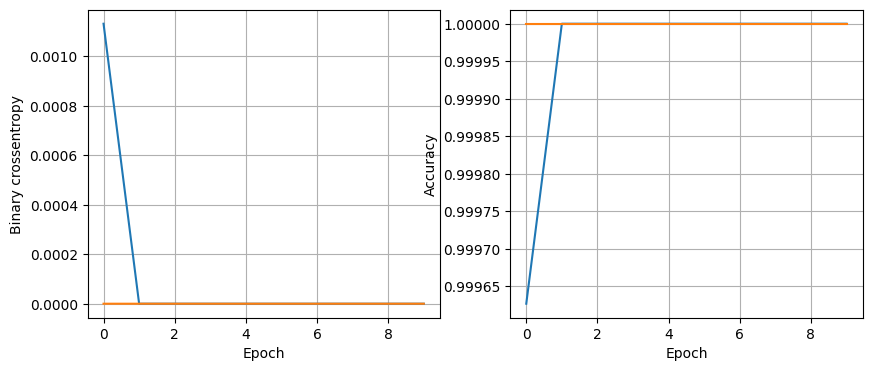

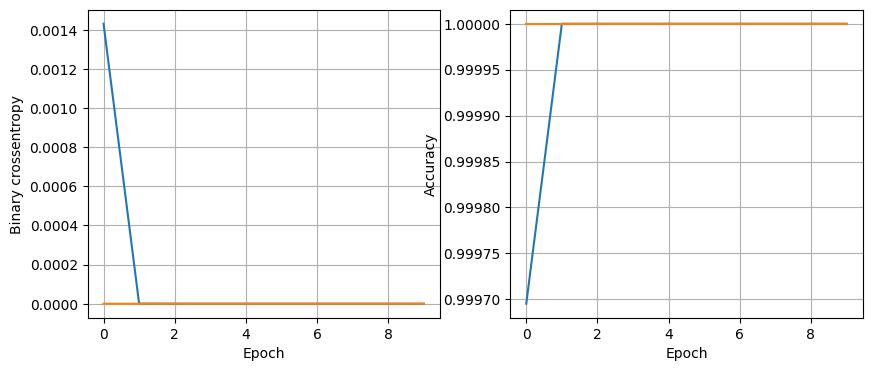

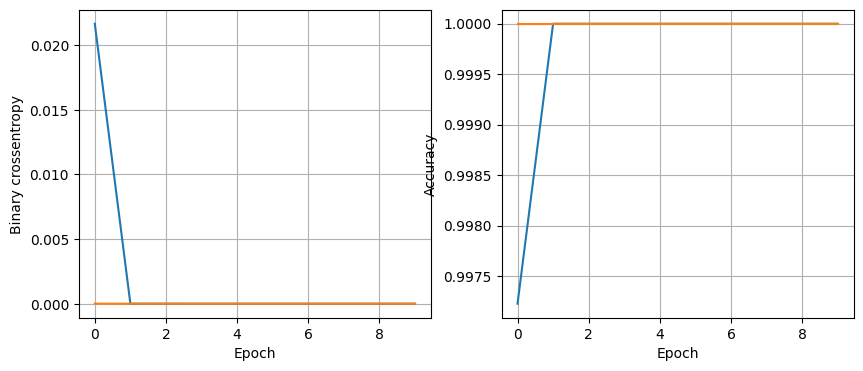

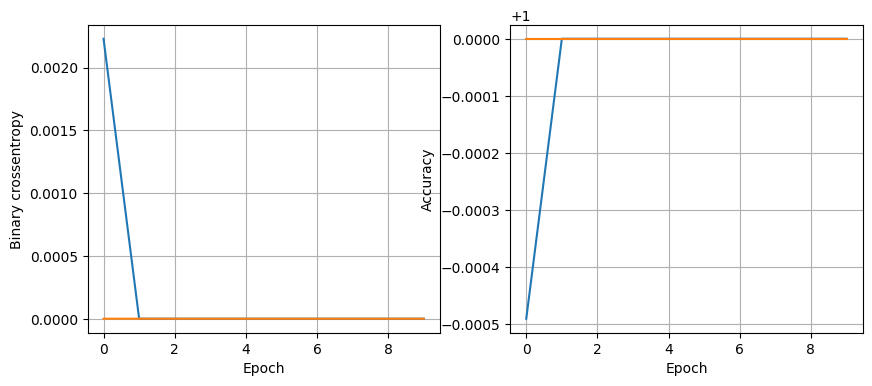

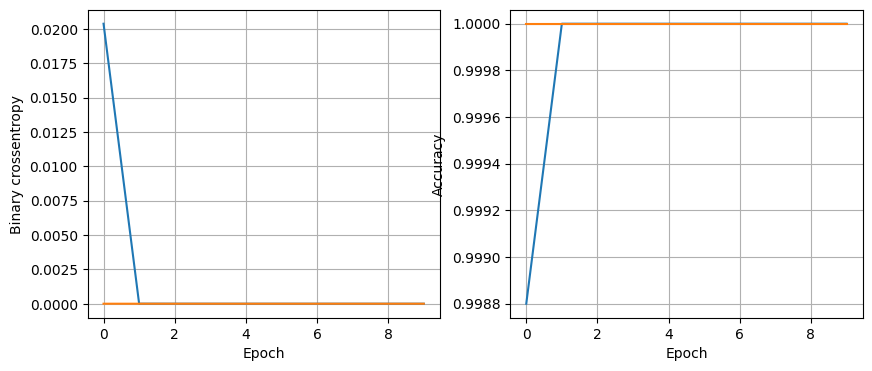

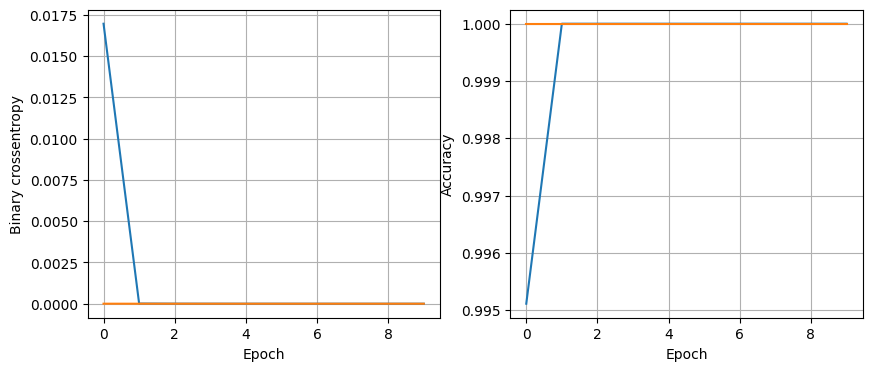

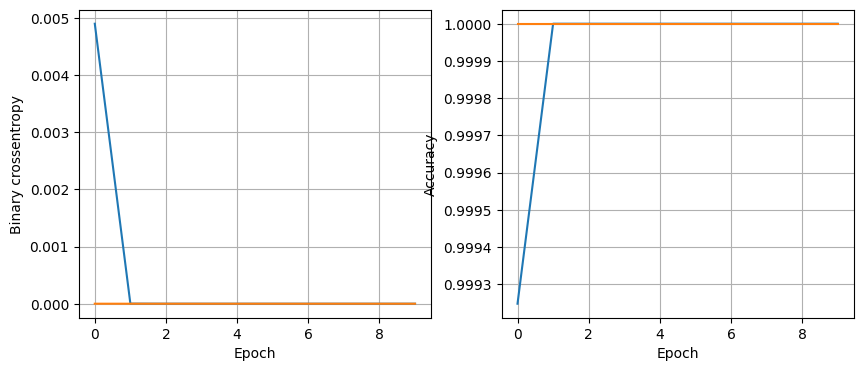

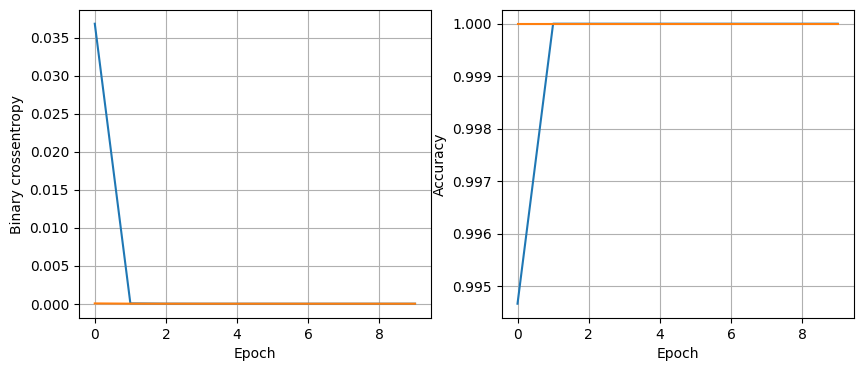

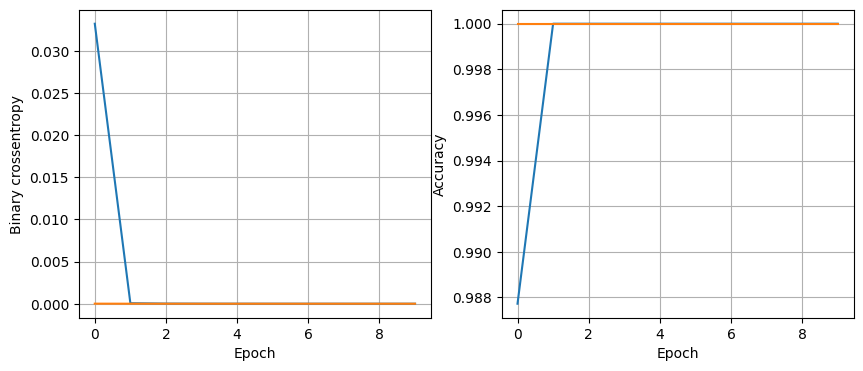

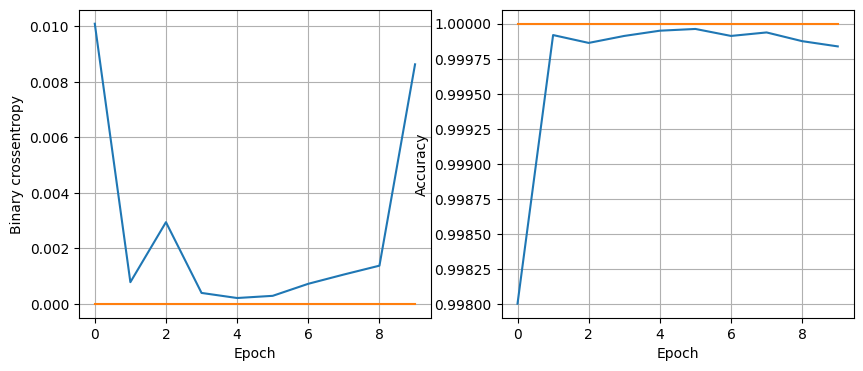

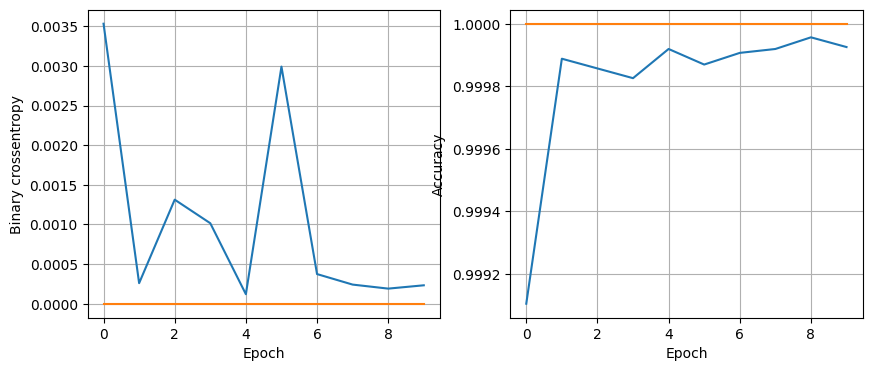

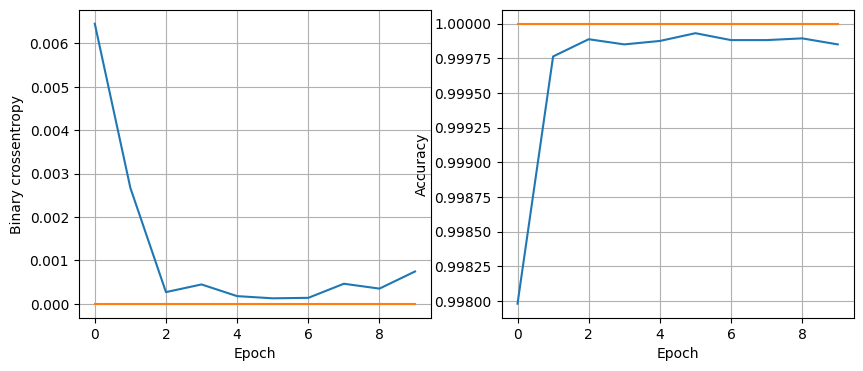

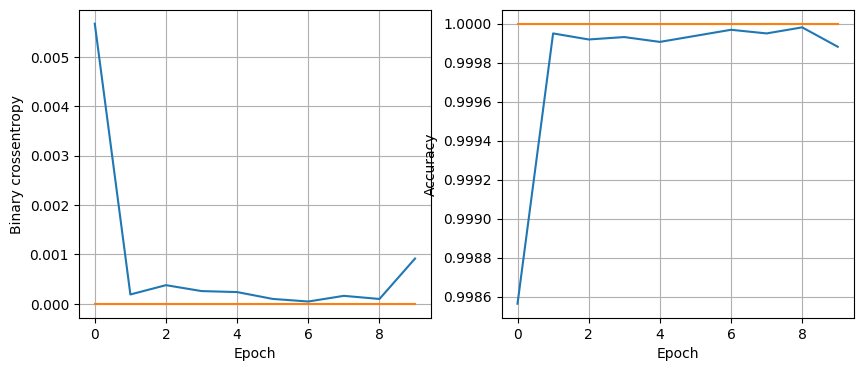

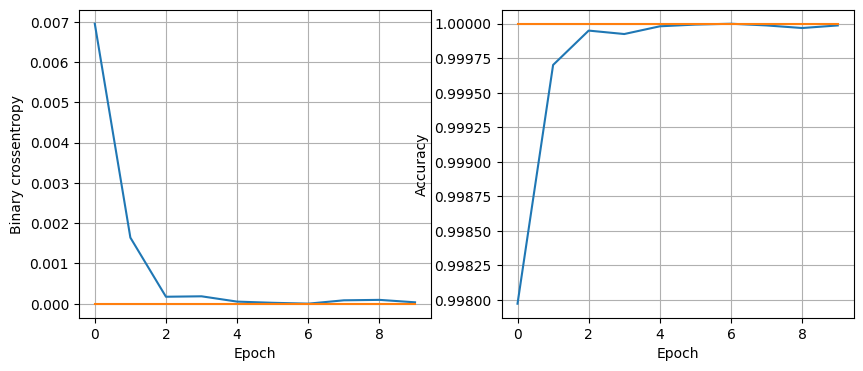

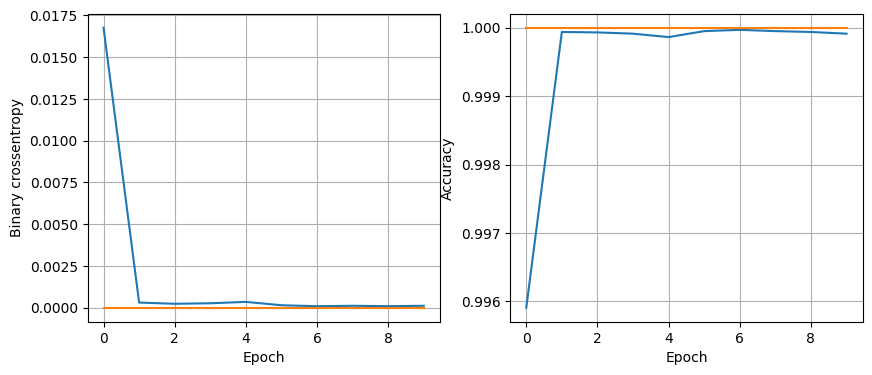

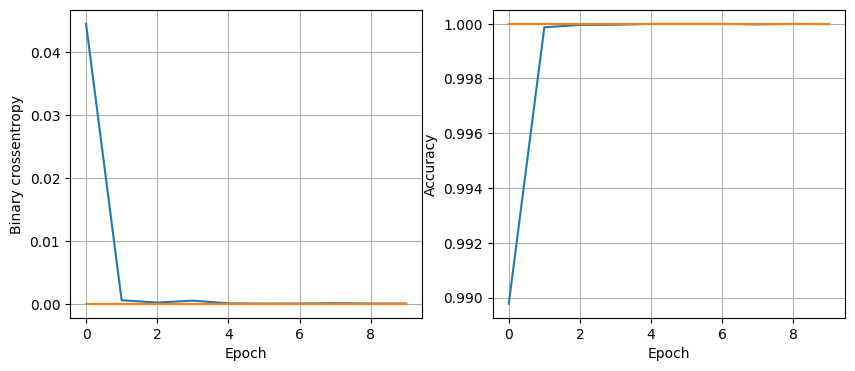

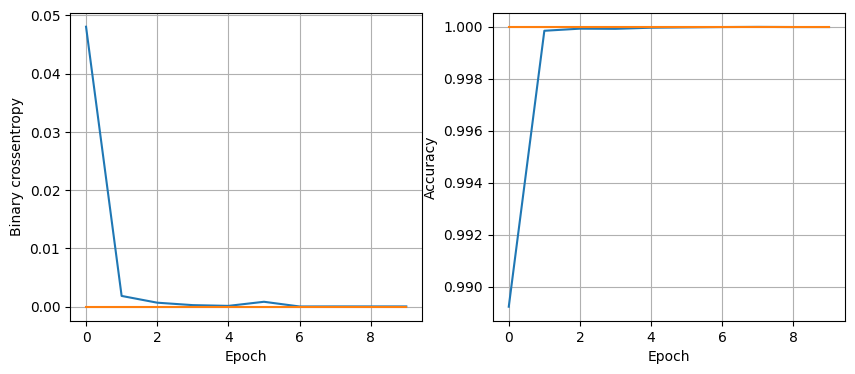

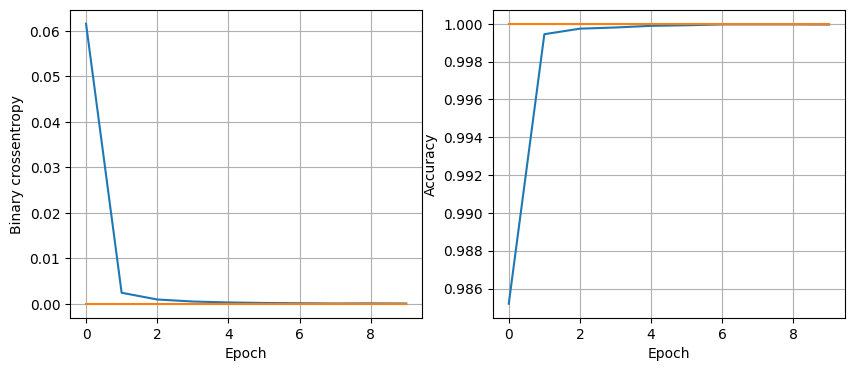

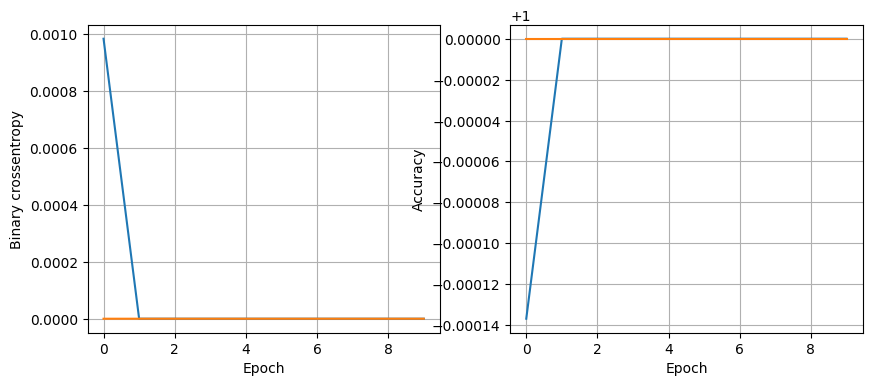

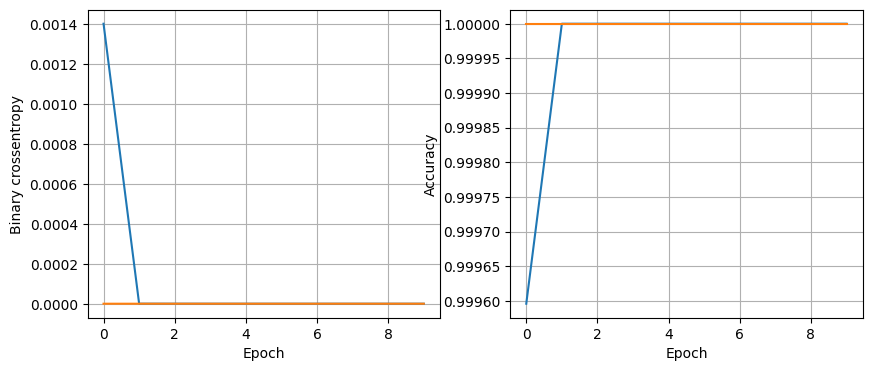

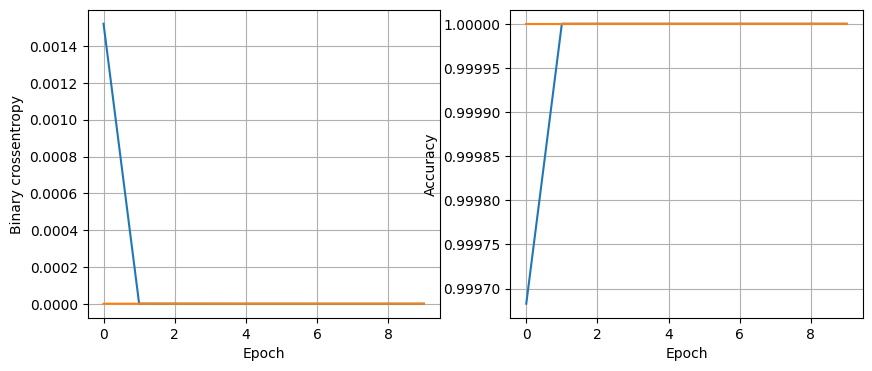

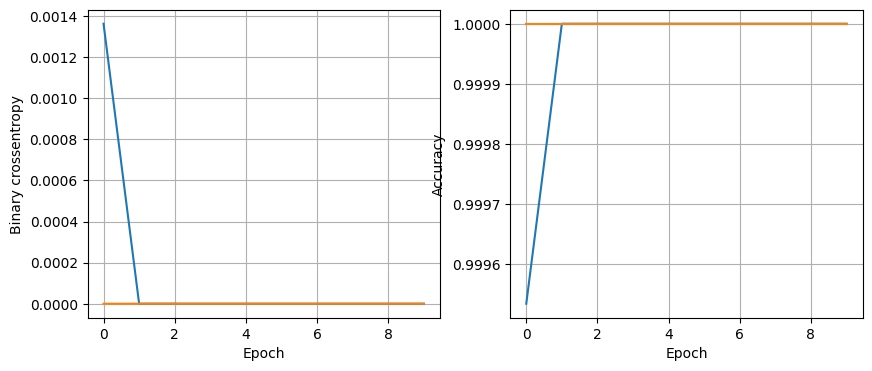

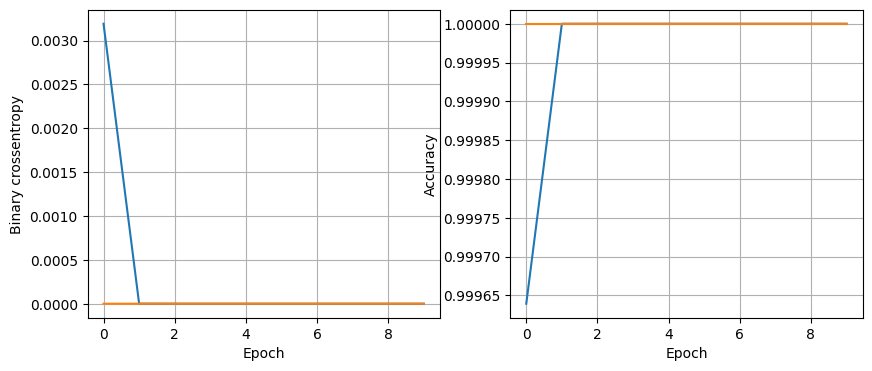

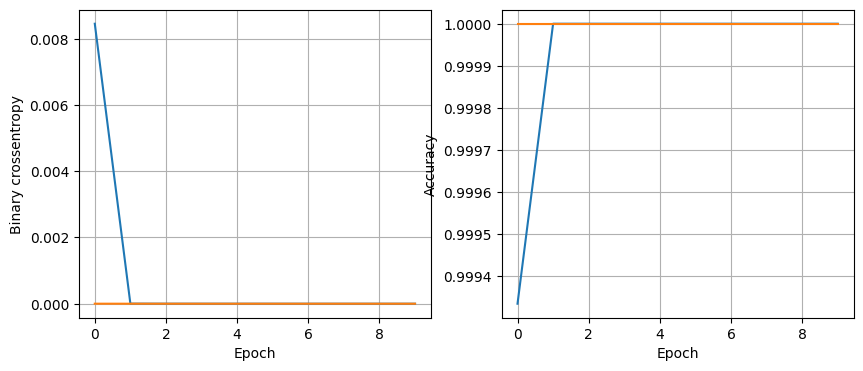

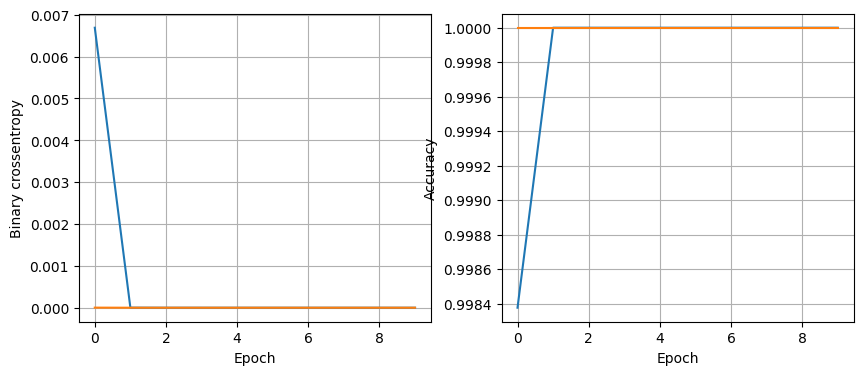

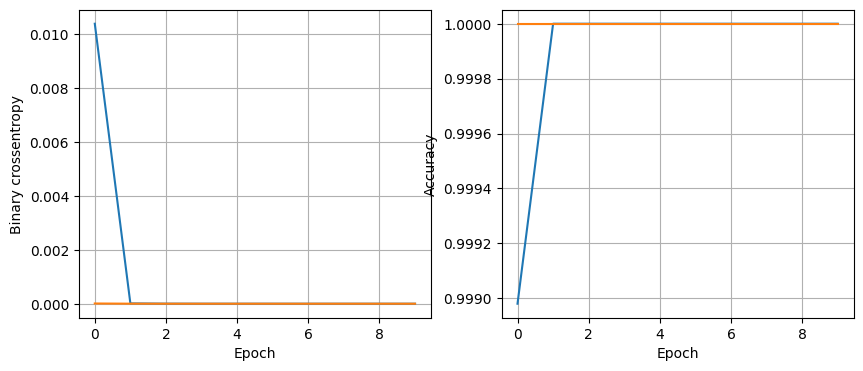

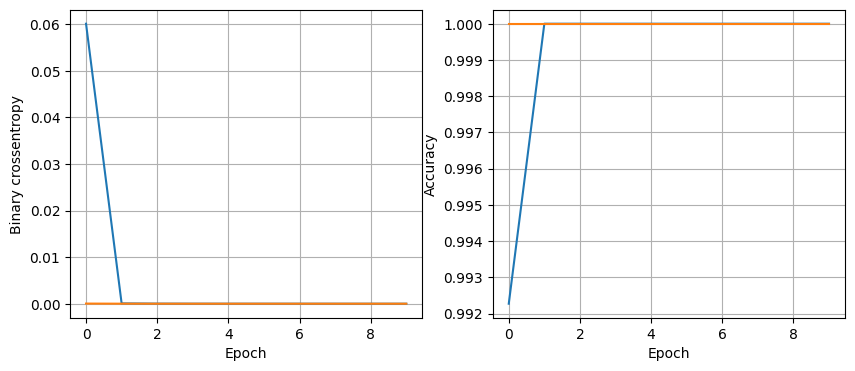

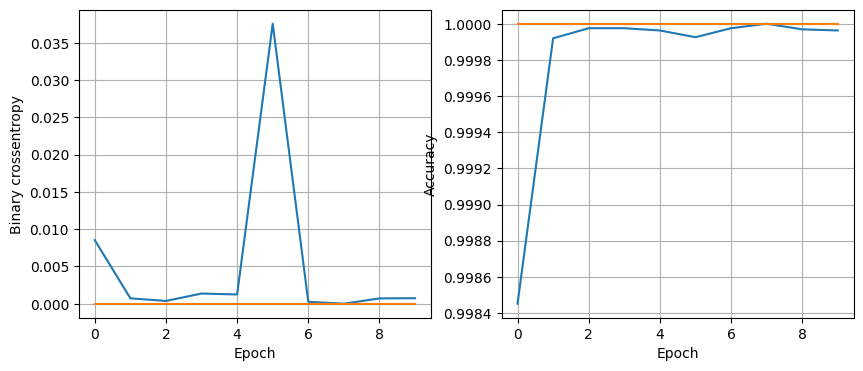

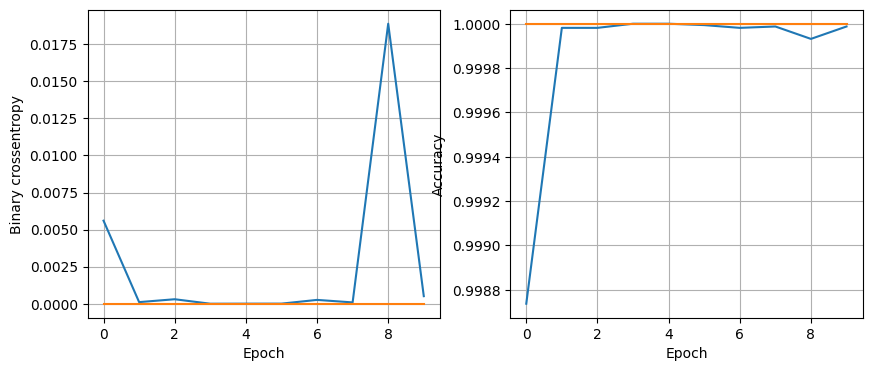

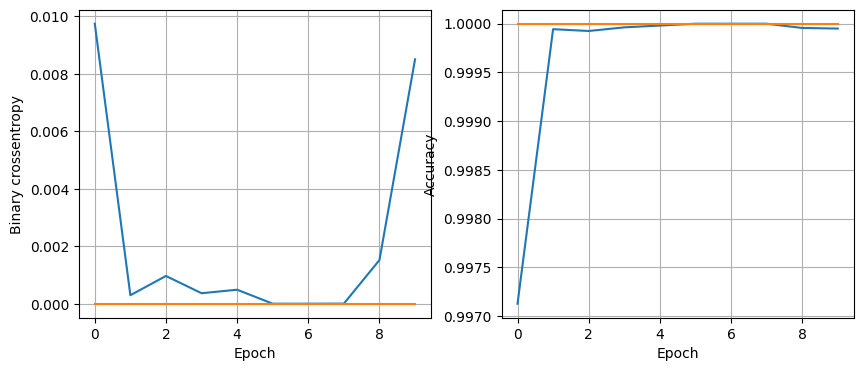

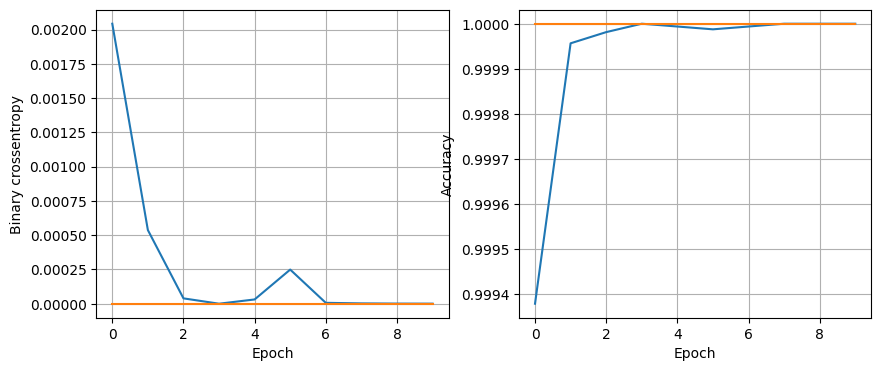

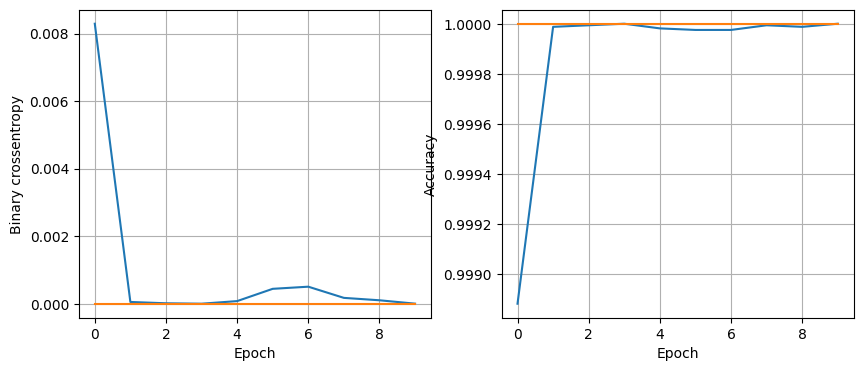

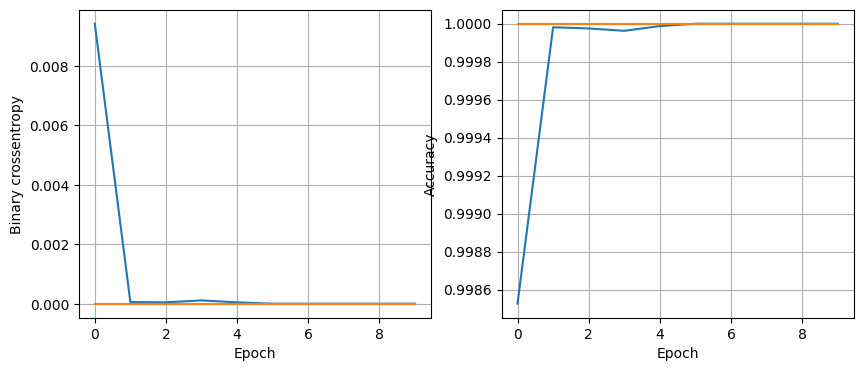

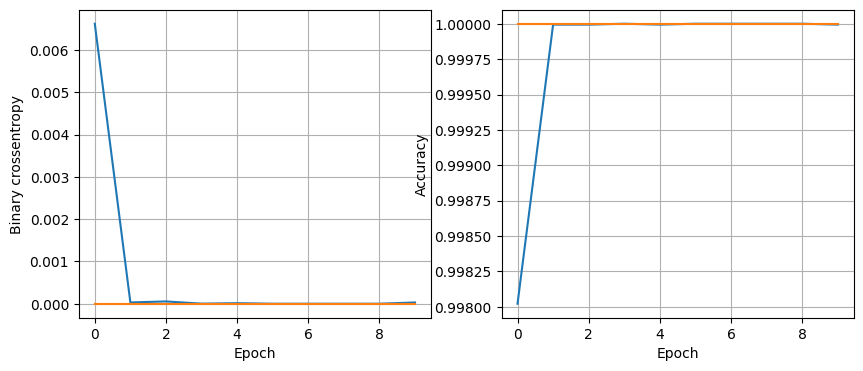

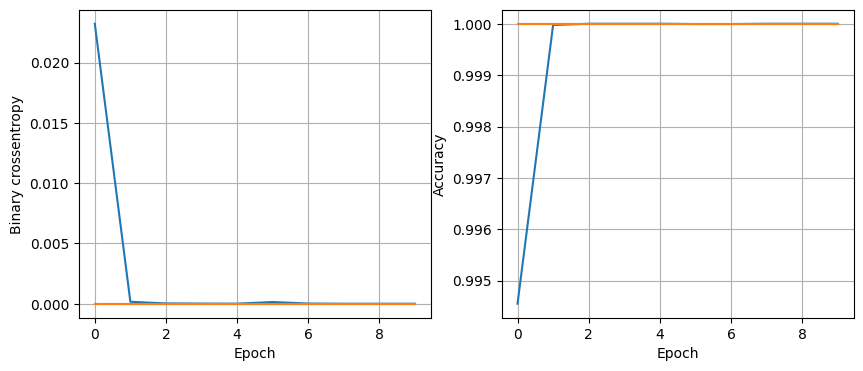

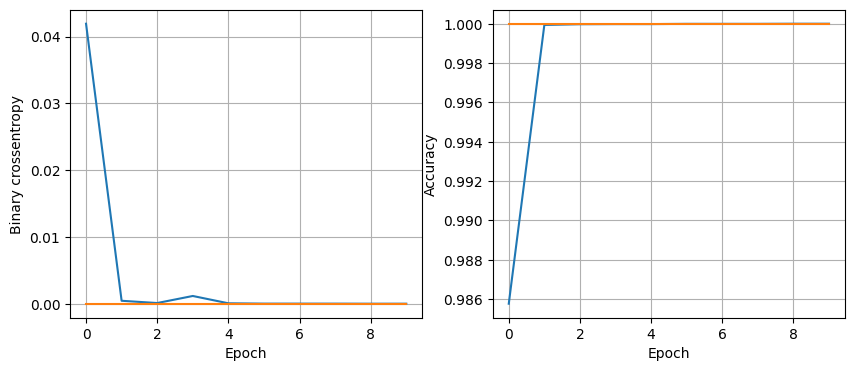

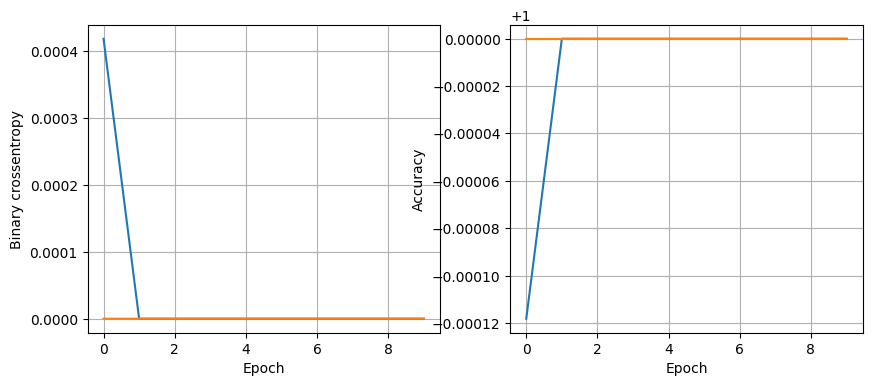

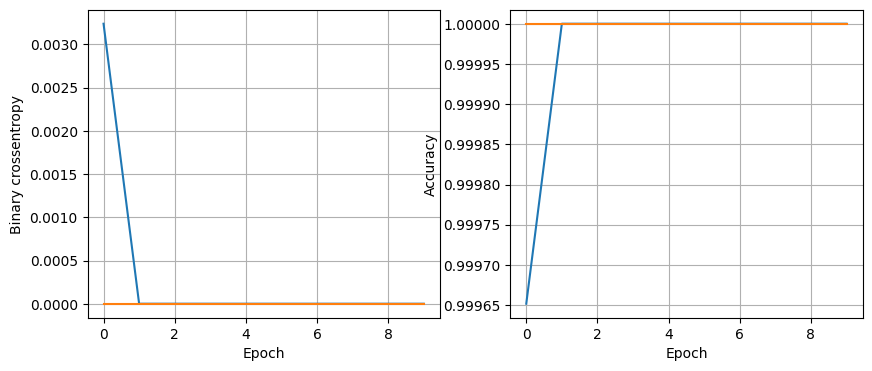

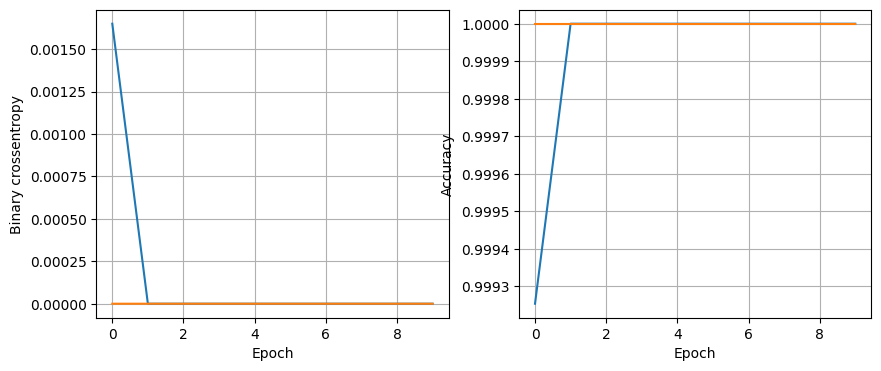

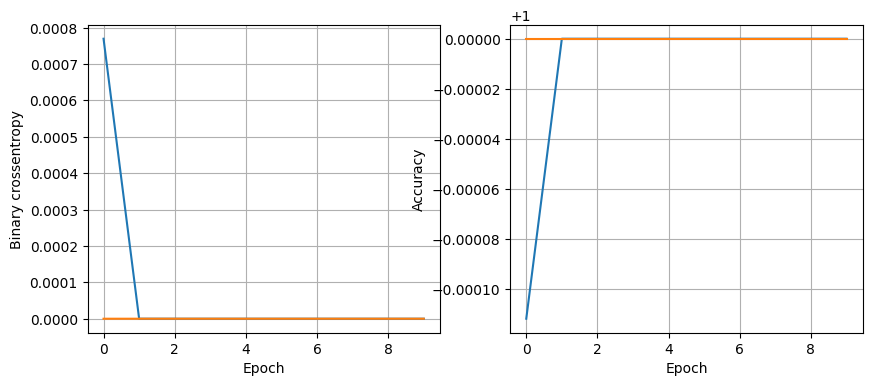

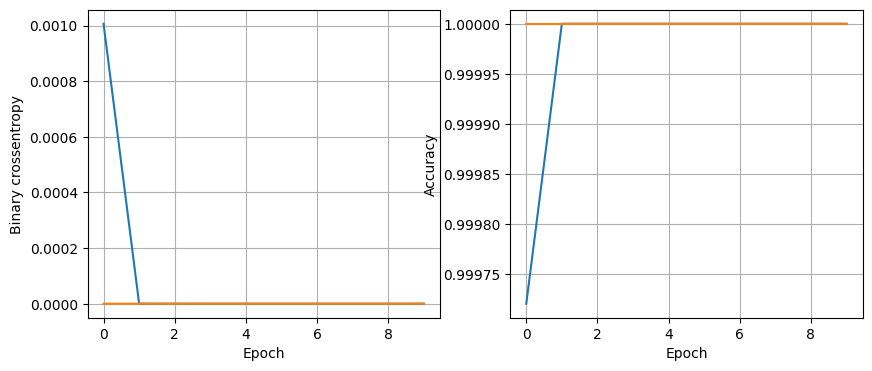

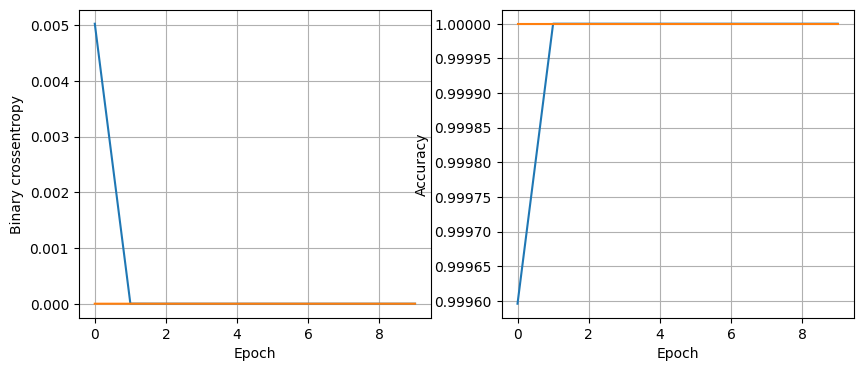

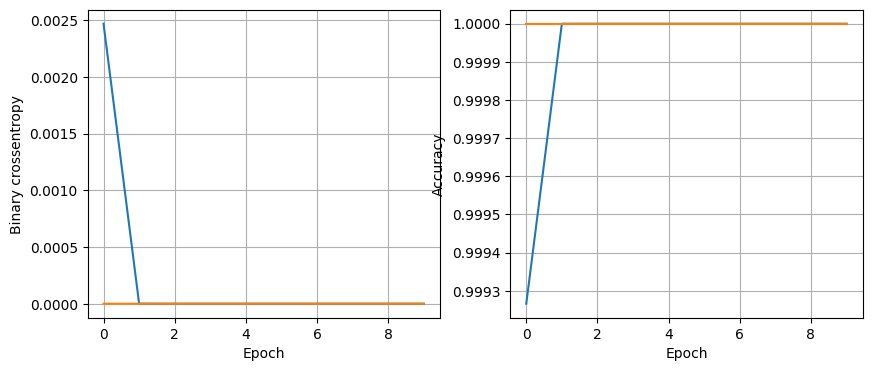

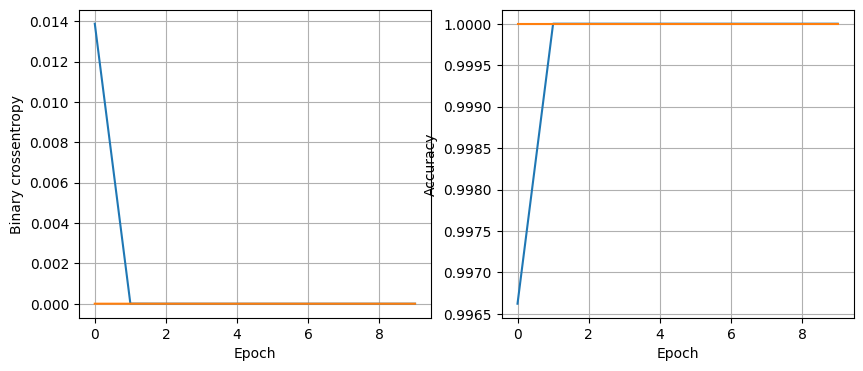

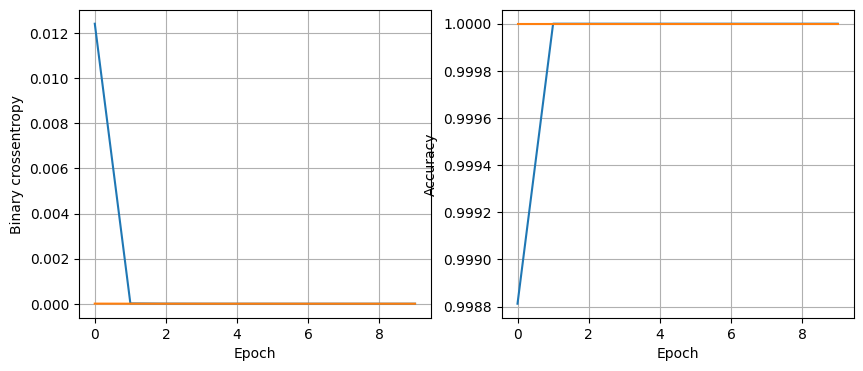

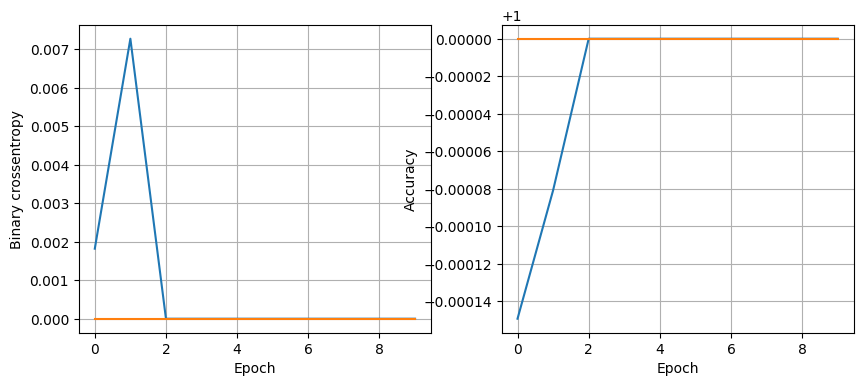

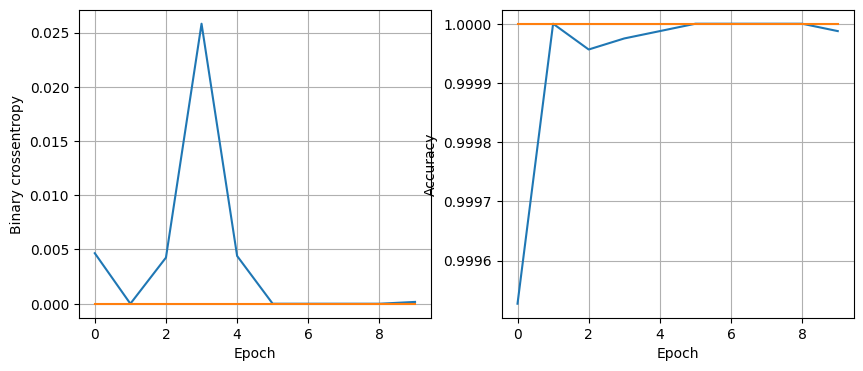

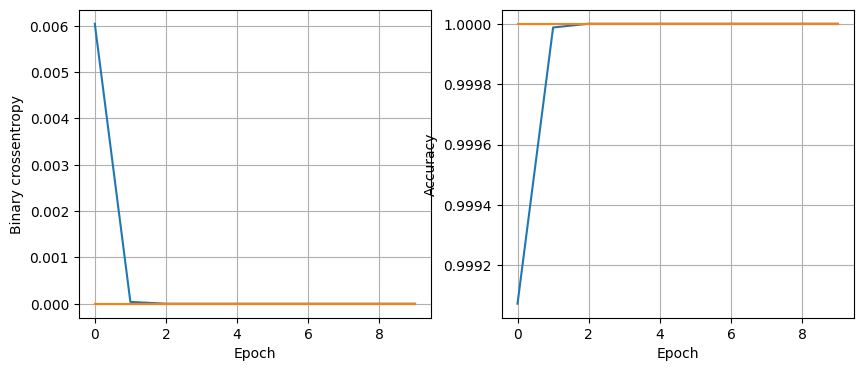

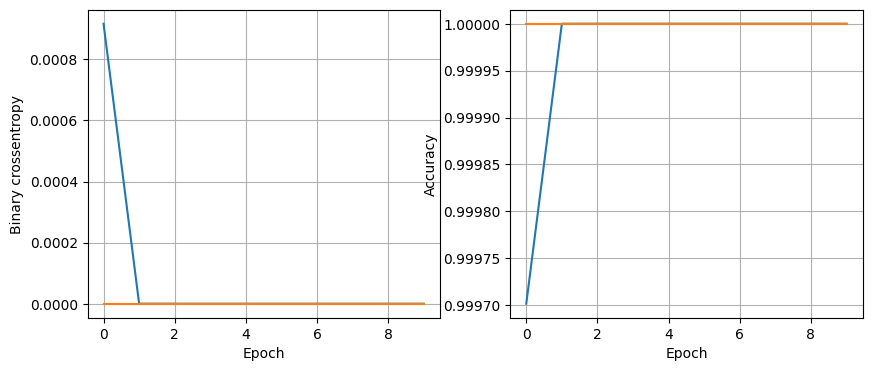

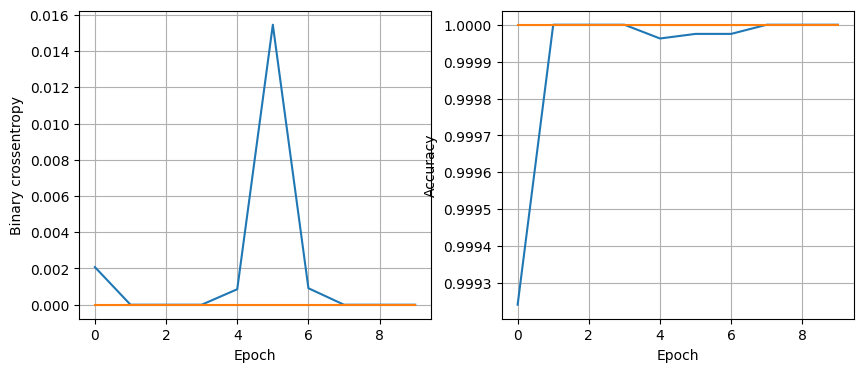

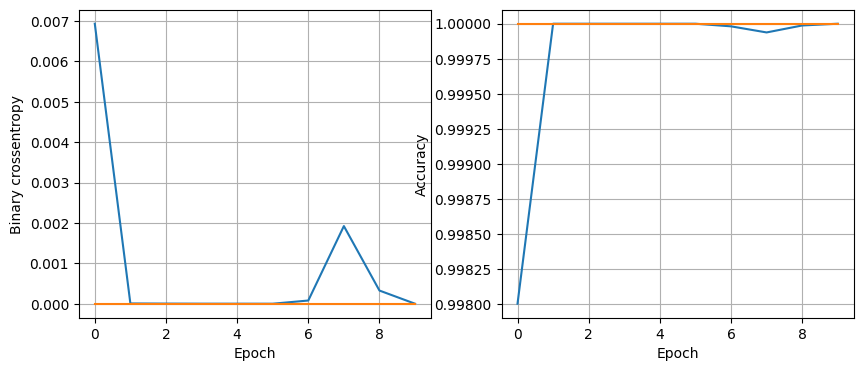

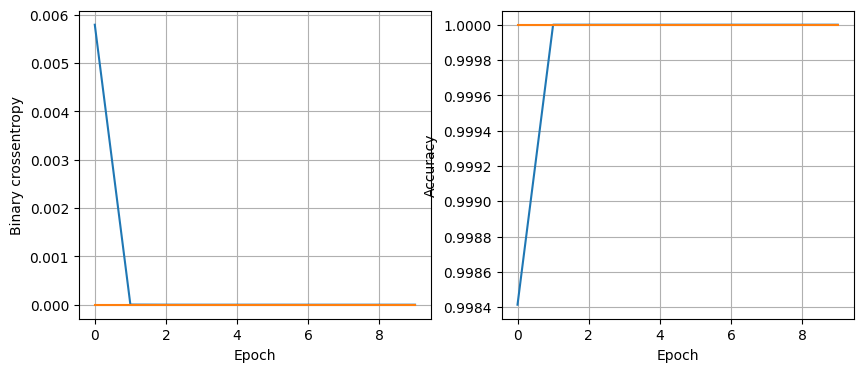

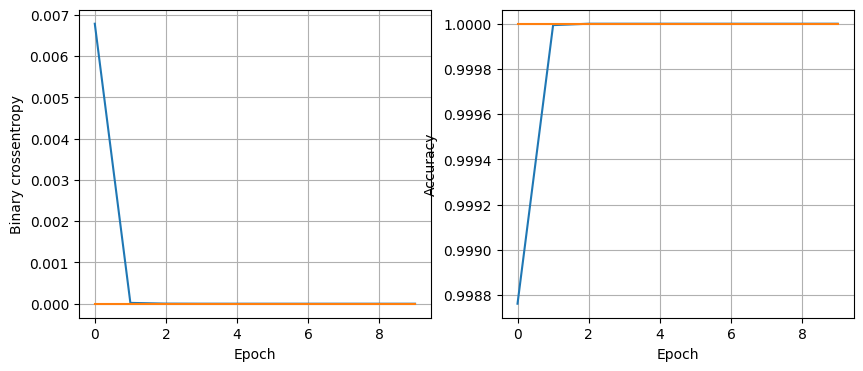

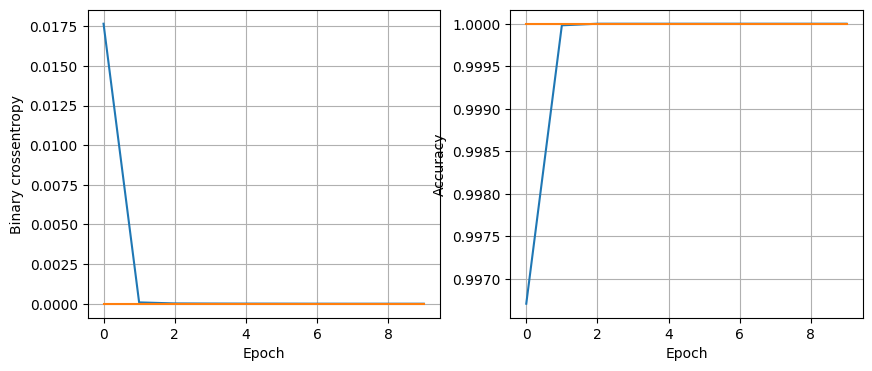

In [21]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 10

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(train_X_imputed, train_y, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(valid_X, valid_y)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [22]:
y_pred = model.predict(test_X_imputed) #To predict class probabilities for the test dataset, where the predictions are stored in the variable y_pred each element represents the probability of the corresponding instance belonging to the positive class.
y_pred = (y_pred > 0.5).astype(int).reshape(-1) #Processes the predicted probabilities by converting them into binary class labels by applying a threshold of 0.5 to each predicted probability.

1047/1047 [==============================] - 1s 492us/step


In [23]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         4
        True       1.00      1.00      1.00     33500

    accuracy                           1.00     33504
   macro avg       1.00      1.00      1.00     33504
weighted avg       1.00      1.00      1.00     33504



Phishing emails Supervised classification

In [24]:
cols = [ 
         'id', #Represents an identifier for each record.
                                            'NumDots', #Indicates the number of dots (periods) in the URL.
                                            'SubdomainLevel', #Represents the level of the subdomain in the URL.
                                            'PathLevel', #Represents the level of the path in the URL.
                                            'UrlLength', #Represents the length of the URL.
                                            'NumDash', #Indicates the number of dashes in the URL.
                                            'NumDashInHostname', #The number of dashes in the hostname portion of the URL.
                                            'AtSymbol', #The presence of the "@" symbol in the URL.
                                            'TildeSymbol', #The presence of the "~" symbol in the URL.
                                            'NumUnderscore', #The number of underscores in the URL.
                                            'IframeOrFrame', #Indicates whether the page contains an iframe or frame.
                                            'MissingTitle', #Indicates whether the page has a missing title.
                                            'ImagesOnlyInForm', #Indicates whether there are images only in form elements.
                                            'SubdomainLevelRT', #Represents the subdomain level as a ratio.
                                            'UrlLengthRT', #Represents the URL length as a ratio.
                                            'PctExtResourceUrlsRT', #The percentage of external resource URLs as a ratio.
                                            'AbnormalExtFormActionR', #The abnormality of external form action as a ratio.
                                            'ExtMetaScriptLinkRT', #The ratio of external meta, script, and link elements.
                                            'PctExtNullSelfRedirectHyperlinksRT', #The percentage of external, null, or self-redirect hyperlinks as a ratio.
                                            'CLASS_LABEL' # Represents the class label, presumably indicating whether the URL is associated with phishing ("1") or not ("0").
        ]
df = pd.read_csv("Phishing.csv")
df.head()

id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                  0         0            0              0  ...   
1                  0         0            0              2  ...   
2                  0         0            0              0  ...   
3                  0         0            0              0  ...   
4                  0         0            0              0  ...   

   IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0              0             0                 1                 1   
1              0             0                 0                 1   
2              0             0                 0                 1   
3              0             0                 0                 1   
4              1             0                 0                 1   

   UrlLengthRT  PctExtResourceUrlsRT  AbnormalExtFormActionR  \
0            0                     1                       1   
1           -1                     1                       1   
2            0                    -1                       1   
3           -1                     1                       1   
4            1                    -1                       0   

   ExtMetaScriptLinkRT  PctExtNullSelfRedirectHyperlinksRT  CLASS_LABEL  
0                   -1                                   1            1  
1                    1                                   1            1  
2                   -1                                   0            1  
3                    1                                  -1            1  
4                   -1                                  -1            1  

[5 rows x 50 columns]

In [25]:
df["MissingTitle"] = df["CLASS_LABEL"].astype(int)

In [26]:
df.head()

id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                  0         0            0              0  ...   
1                  0         0            0              2  ...   
2                  0         0            0              0  ...   
3                  0         0            0              0  ...   
4                  0         0            0              0  ...   

   IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0              0             1                 1                 1   
1              0             1                 0                 1   
2              0             1                 0                 1   
3              0             1                 0                 1   
4              1             1                 0                 1   

   UrlLengthRT  PctExtResourceUrlsRT  AbnormalExtFormActionR  \
0            0                     1                       1   
1           -1                     1                       1   
2            0                    -1                       1   
3           -1                     1                       1   
4            1                    -1                       0   

   ExtMetaScriptLinkRT  PctExtNullSelfRedirectHyperlinksRT  CLASS_LABEL  
0                   -1                                   1            1  
1                    1                                   1            1  
2                   -1                                   0            1  
3                    1                                  -1            1  
4                   -1                                  -1            1  

[5 rows x 50 columns]

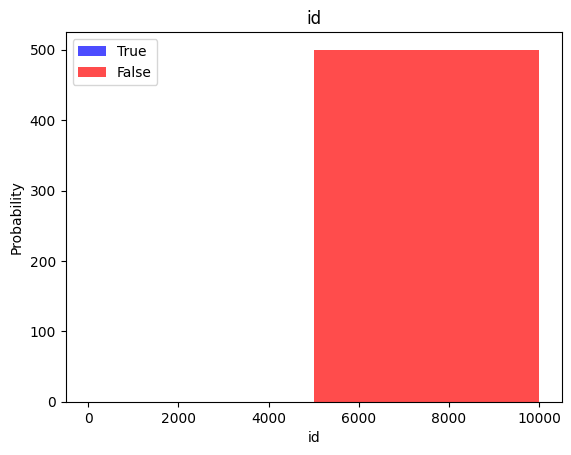

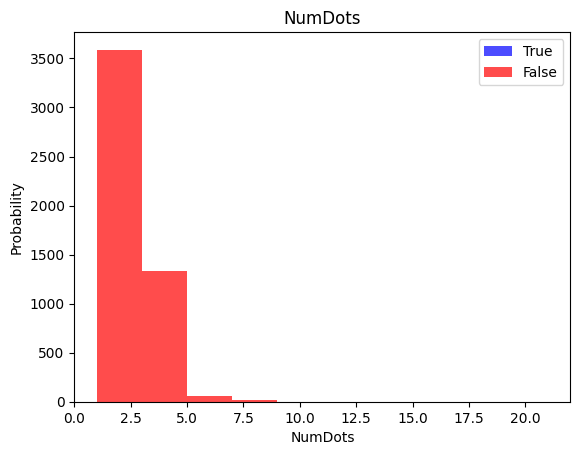

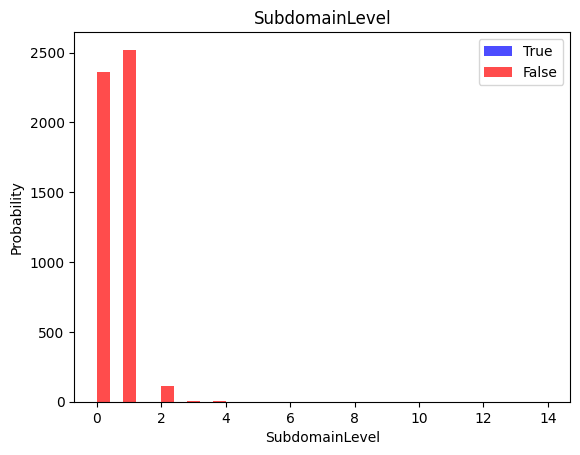

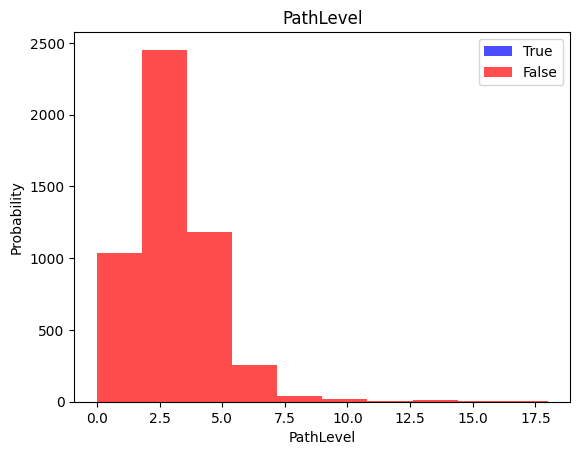

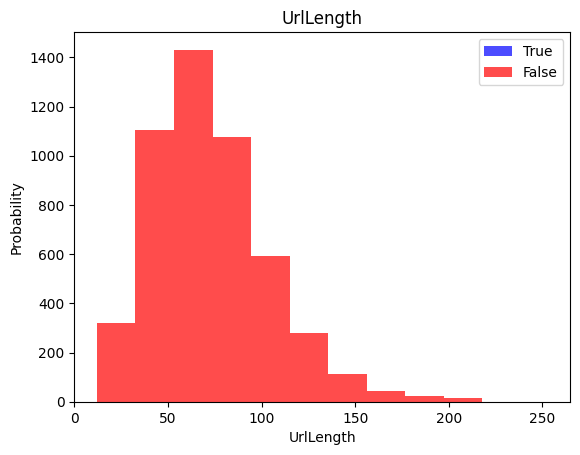

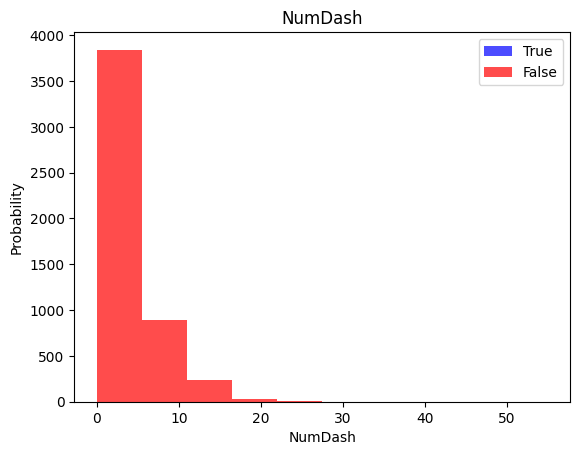

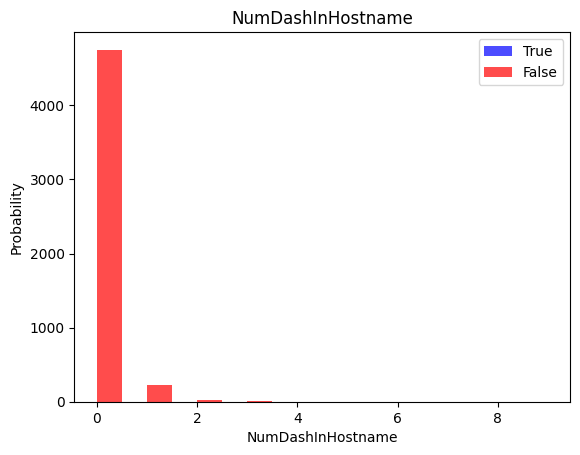

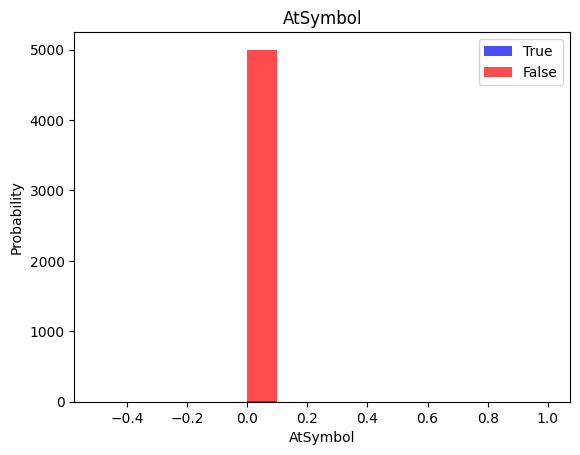

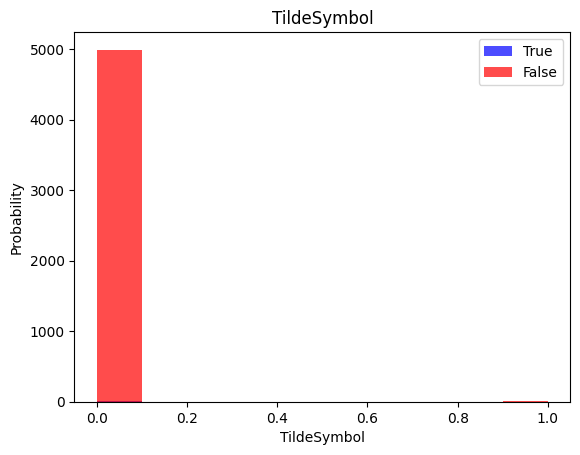

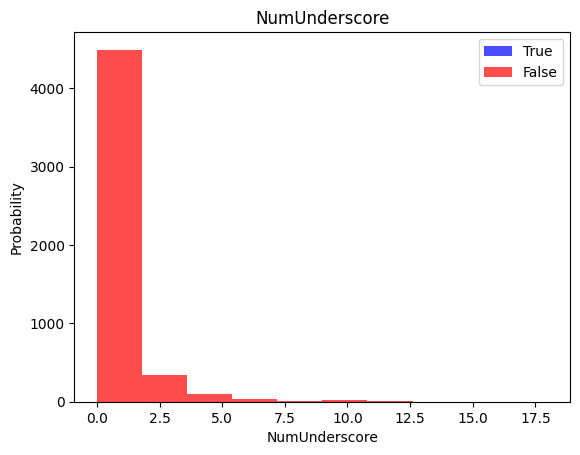

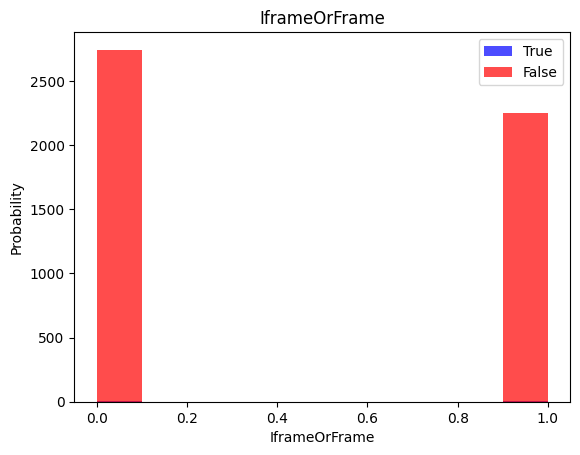

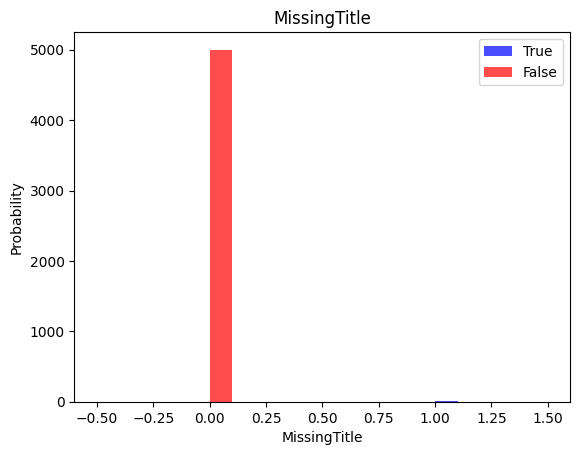

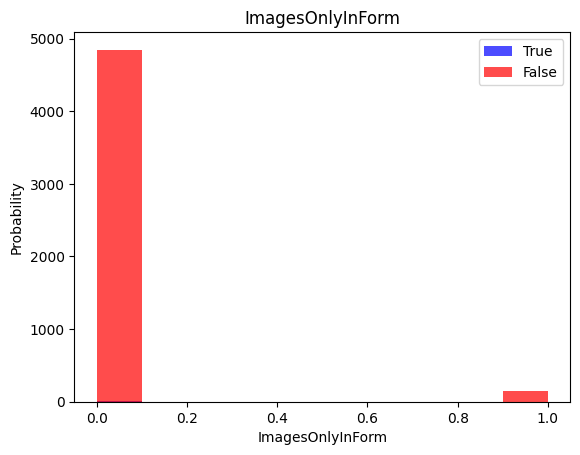

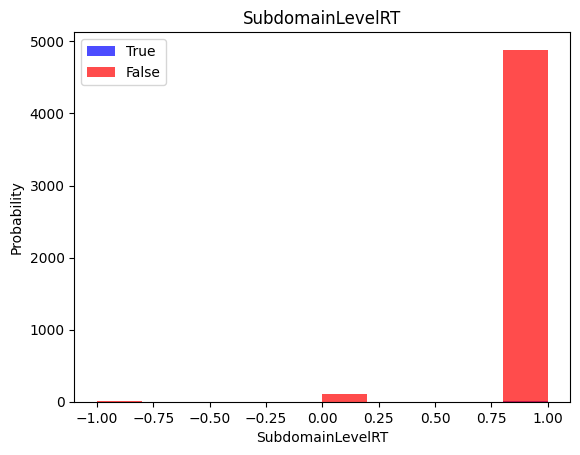

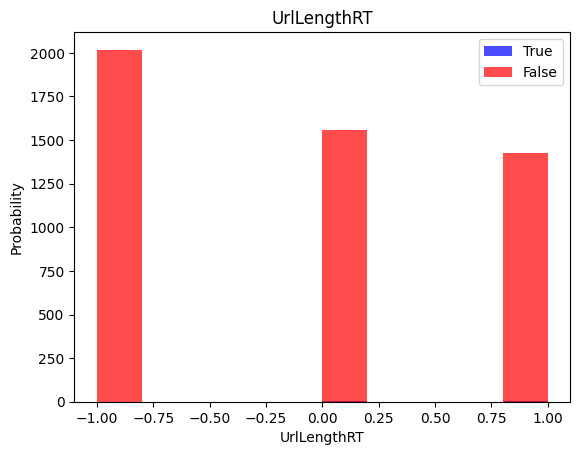

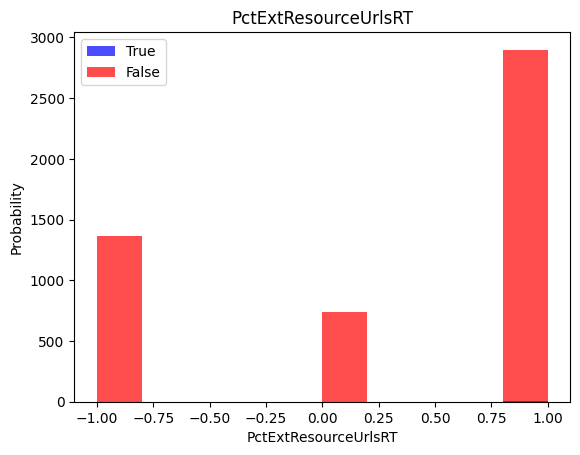

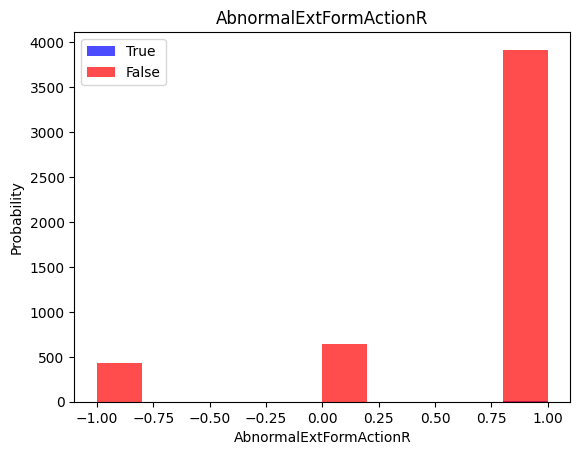

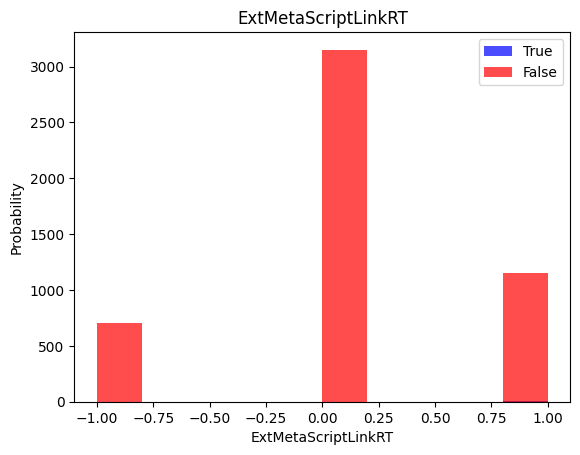

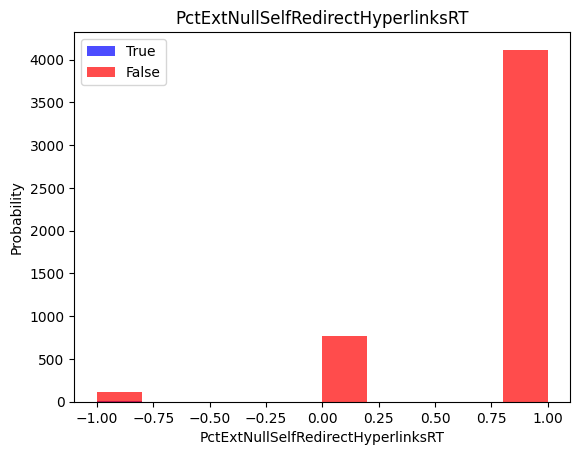

In [27]:
for label in cols[:-1]:
    plt.hist(df[df["MissingTitle"]==1][label], color='blue', label='True', alpha=0.7, density=True)
    plt.hist(df[df["CLASS_LABEL"]==0][label], color='red', label='False', alpha=0.7, density=False)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [28]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [29]:
def scale_dataset(dataframe, oversample=False): 
    X = dataframe.drop(columns=['MissingTitle', 'CLASS_LABEL']).values 
    y = dataframe['MissingTitle'].values 
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample: 
        ros = RandomOverSampler() 
        X, y = ros.fit_resample(X, y)
    return X, y


In [30]:
train_X, train_y = scale_dataset(train, oversample=True) 
valid_X, valid_y = scale_dataset(valid, oversample=False) 
test_X, test_y = scale_dataset(test, oversample=False) 

In [31]:
imputer = SimpleImputer(strategy='mean')
train_X_imputed = imputer.fit_transform(train_X)
test_X_imputed = imputer.transform(test_X)

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(train_X_imputed, train_y)

KNeighborsClassifier()

In [33]:
y_pred = knn_model.predict(test_X_imputed)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       970
           1       0.98      0.96      0.97      1030

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [34]:
nb_model = GaussianNB() 
nb_model = nb_model.fit(train_X_imputed, train_y)

In [35]:
y_pred = nb_model.predict(test_X_imputed) 
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       970
           1       0.52      1.00      0.68      1030

    accuracy                           0.52      2000
   macro avg       0.76      0.50      0.35      2000
weighted avg       0.75      0.52      0.36      2000



In [36]:
lg_model = LogisticRegression() 
lg_model = lg_model.fit(train_X_imputed, train_y)

In [37]:
y_pred = lg_model.predict(test_X_imputed)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       970
           1       1.00      0.99      1.00      1030

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [38]:
svm_model = SVC()
svm_model = svm_model.fit(train_X_imputed, train_y)

In [39]:
y_pred = svm_model.predict(test_X_imputed)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       0.99      0.99      0.99      1030

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [40]:
def plot_history(history): 
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) 
  ax1.plot(history.history['loss'], label='loss') 
  ax1.plot(history.history['val_loss'], label='val_loss') 
  ax1.set_xlabel('Epoch') 
  ax1.set_ylabel('Binary crossentropy') 
  ax1.grid(True) 
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy') 
  ax2.set_xlabel('Epoch') 
  ax2.set_ylabel('Accuracy') 
  ax2.grid(True)

In [41]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    input_dim = X_train.shape[1]  # Assuming X_train is a NumPy array or DataFrame with the appropriate shape

    nn_model = Sequential()
    nn_model.add(Dense(num_nodes, activation='relu', input_dim=input_dim))
    nn_model.add(Dense(1, activation='sigmoid'))
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    
    return nn_model, history

In [43]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

16 nodes, dropout 0, lr 0.01, batch size 32
63/63 [==============================] - 0s 613us/step - loss: 0.0167 - accuracy: 0.9970
16 nodes, dropout 0, lr 0.01, batch size 64
63/63 [==============================] - 0s 614us/step - loss: 0.0211 - accuracy: 0.9965
16 nodes, dropout 0, lr 0.01, batch size 128
63/63 [==============================] - 0s 661us/step - loss: 0.0206 - accuracy: 0.9965
16 nodes, dropout 0, lr 0.005, batch size 32
63/63 [==============================] - 0s 629us/step - loss: 0.0213 - accuracy: 0.9975
16 nodes, dropout 0, lr 0.005, batch size 64
63/63 [==============================] - 0s 613us/step - loss: 0.0276 - accuracy: 0.9955
16 nodes, dropout 0, lr 0.005, batch size 128
63/63 [==============================] - 0s 645us/step - loss: 0.0234 - accuracy: 0.9960
16 nodes, dropout 0, lr 0.001, batch size 32
63/63 [==============================] - 0s 645us/step - loss: 0.0218 - accuracy: 0.9970
16 nodes, dropout 0, lr 0.001, batch size 64
63/63 [===========

C:\Users\marty\AppData\Local\Temp\ipykernel_8200\67577923.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


32 nodes, dropout 0, lr 0.005, batch size 32
63/63 [==============================] - 0s 653us/step - loss: 0.0246 - accuracy: 0.9965
32 nodes, dropout 0, lr 0.005, batch size 64
63/63 [==============================] - 0s 629us/step - loss: 0.0174 - accuracy: 0.9975
32 nodes, dropout 0, lr 0.005, batch size 128
63/63 [==============================] - 0s 605us/step - loss: 0.0174 - accuracy: 0.9965
32 nodes, dropout 0, lr 0.001, batch size 32
63/63 [==============================] - 0s 662us/step - loss: 0.0175 - accuracy: 0.9975
32 nodes, dropout 0, lr 0.001, batch size 64
63/63 [==============================] - 0s 646us/step - loss: 0.0155 - accuracy: 0.9960
32 nodes, dropout 0, lr 0.001, batch size 128
63/63 [==============================] - 0s 622us/step - loss: 0.0150 - accuracy: 0.9950
32 nodes, dropout 0.2, lr 0.01, batch size 32
63/63 [==============================] - 0s 630us/step - loss: 0.0317 - accuracy: 0.9970
32 nodes, dropout 0.2, lr 0.01, batch size 64
63/63 [======

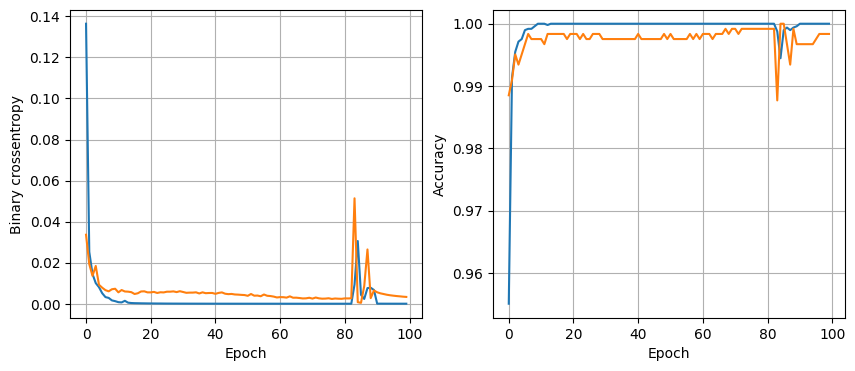

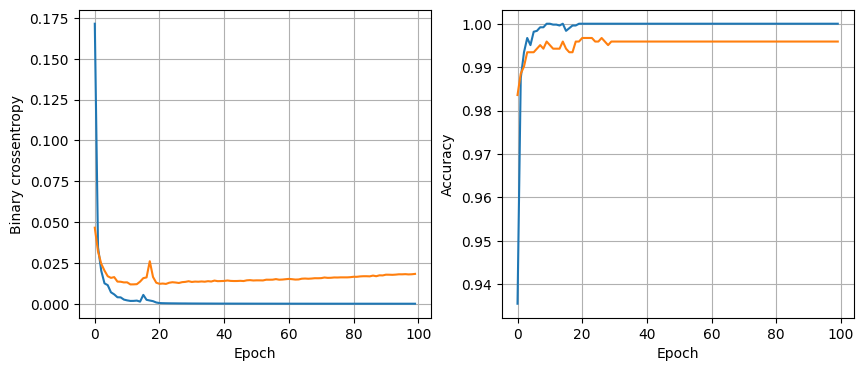

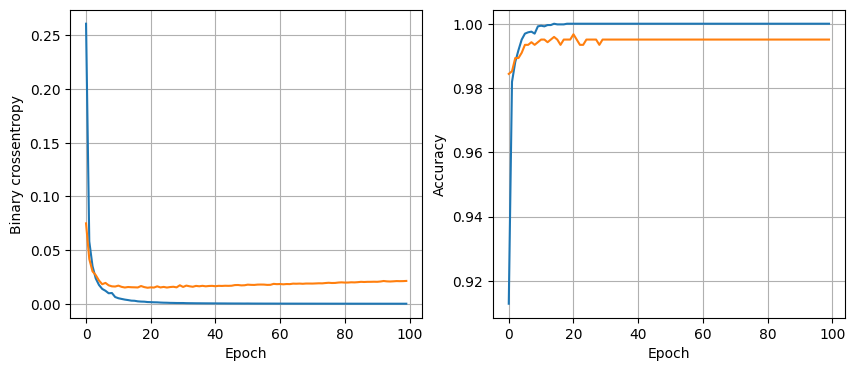

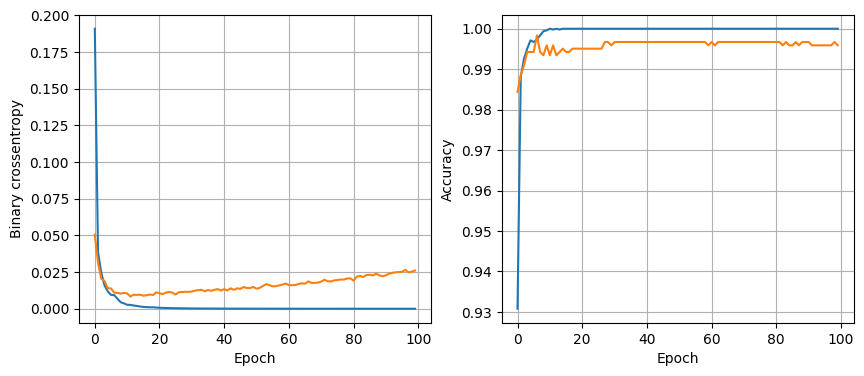

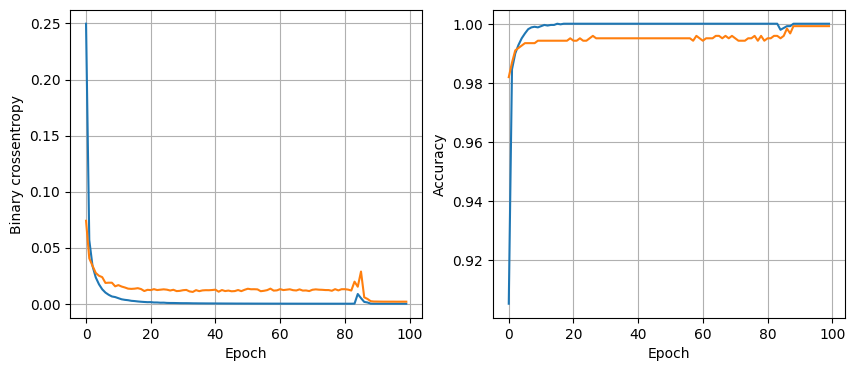

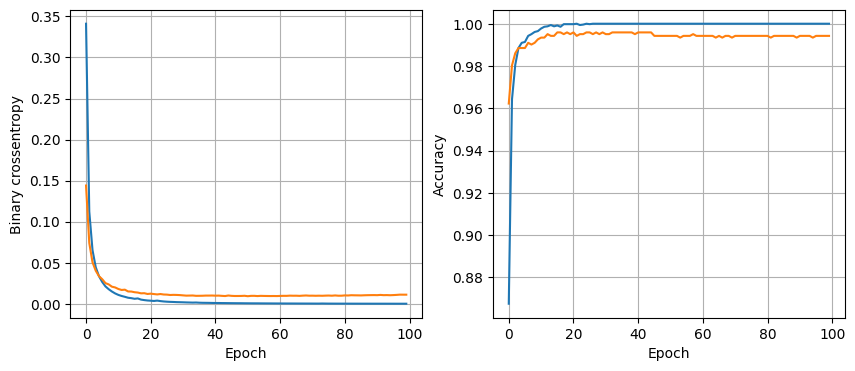

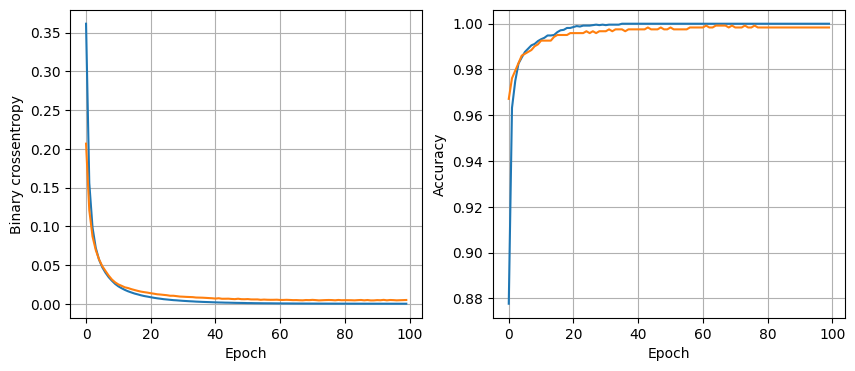

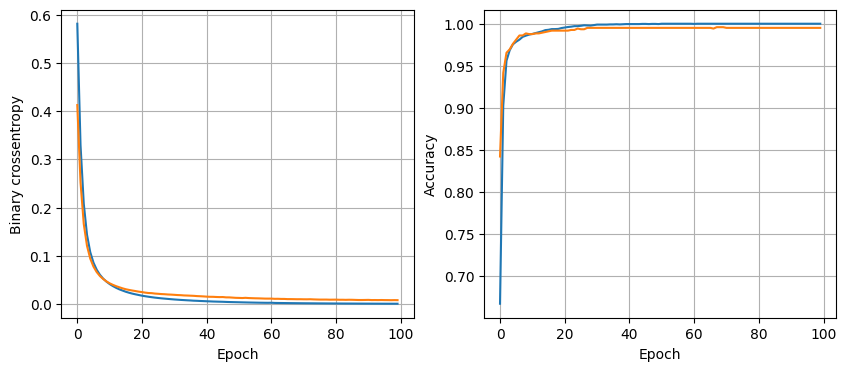

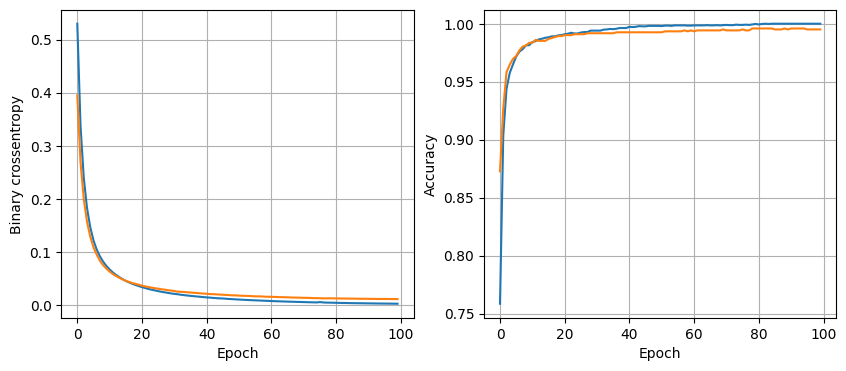

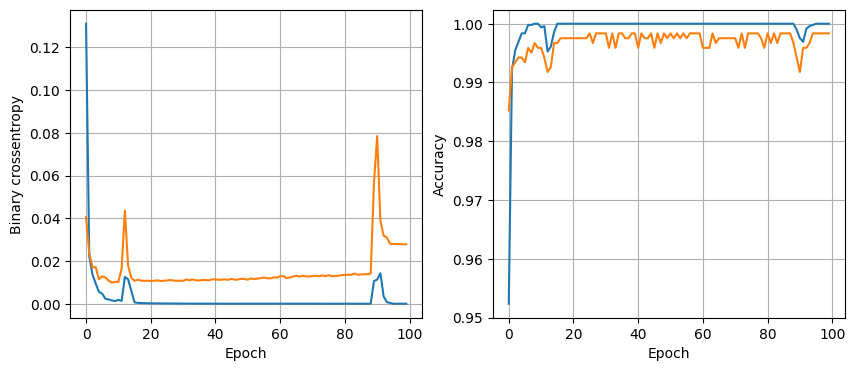

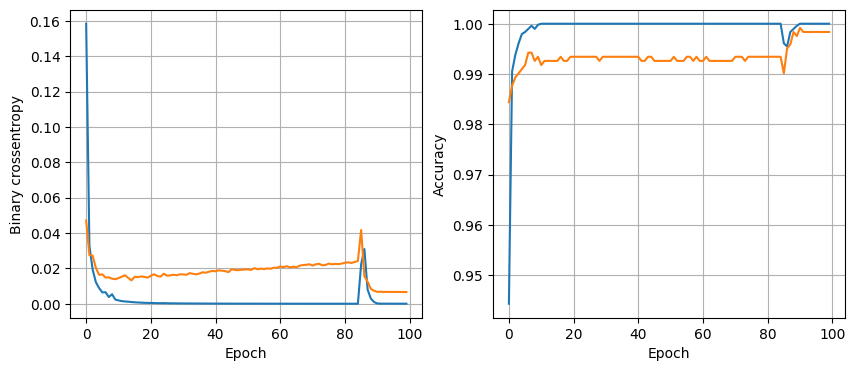

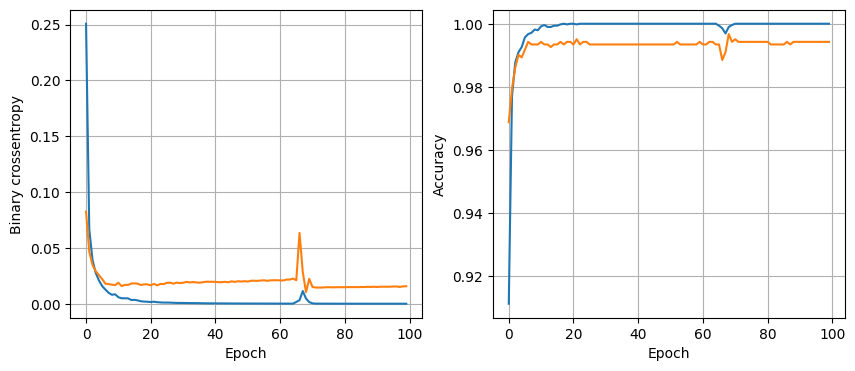

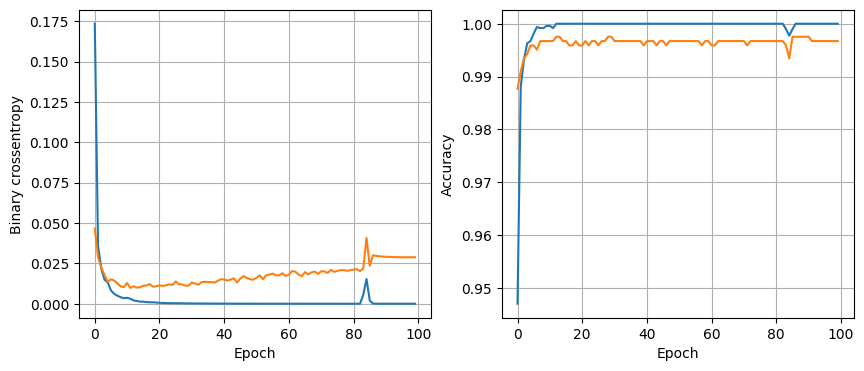

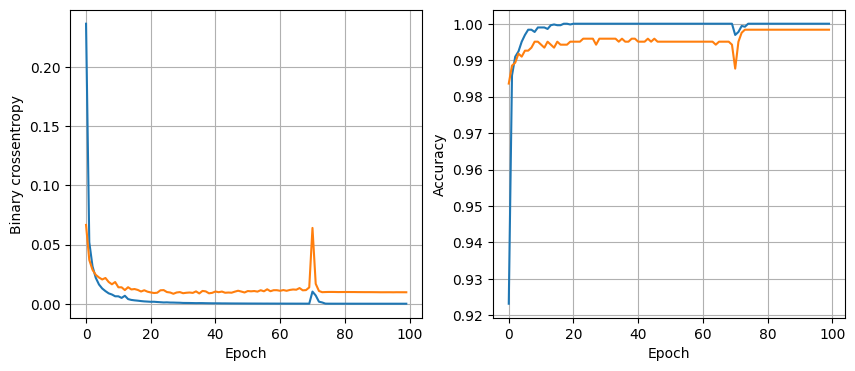

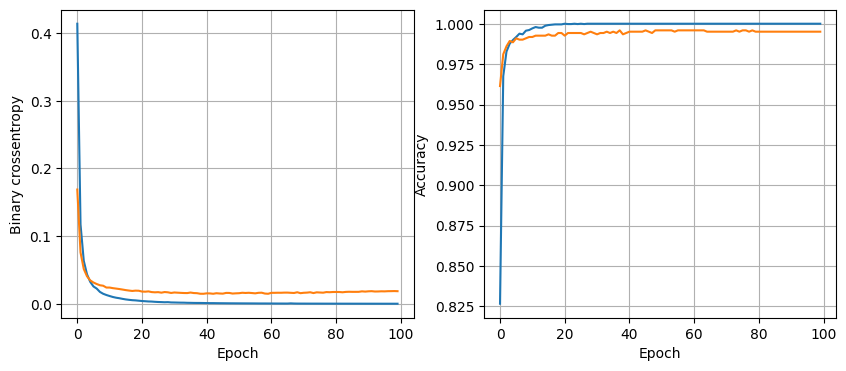

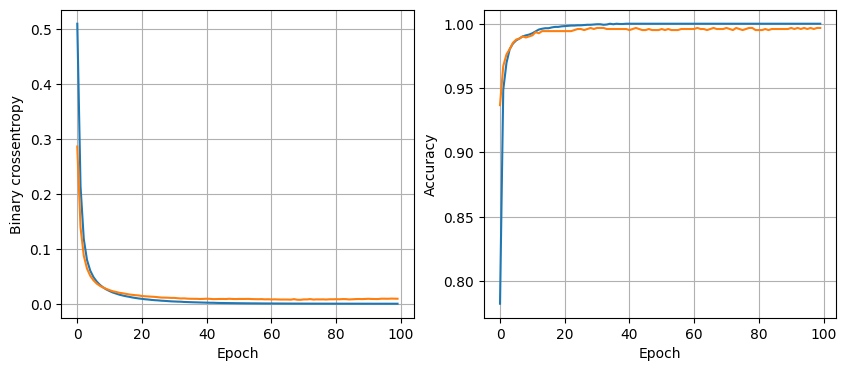

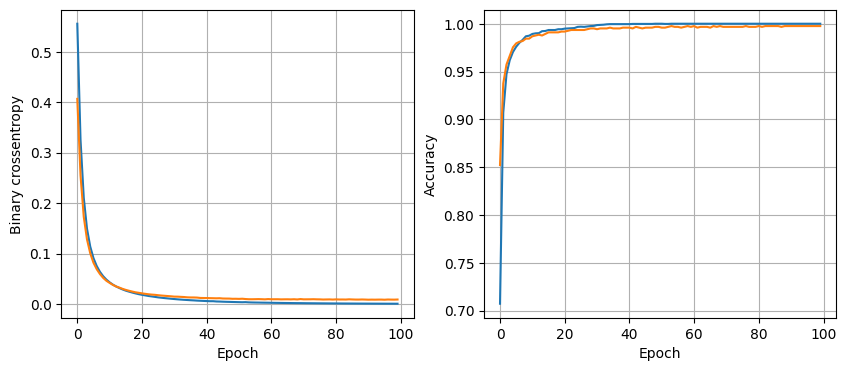

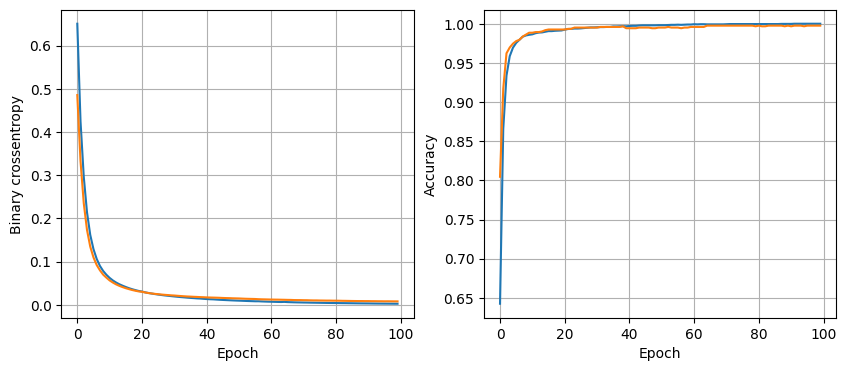

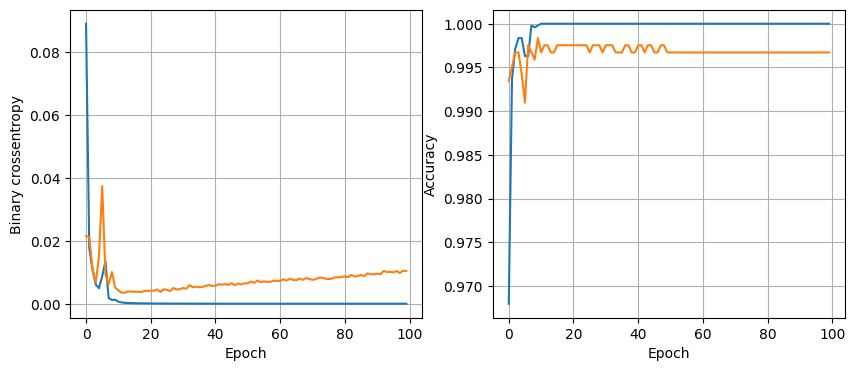

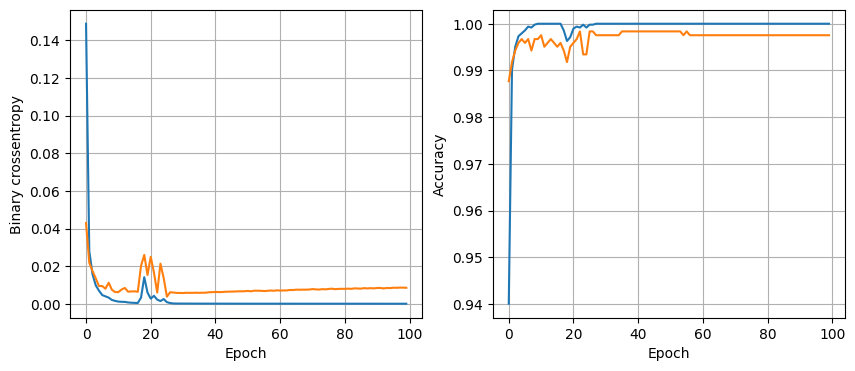

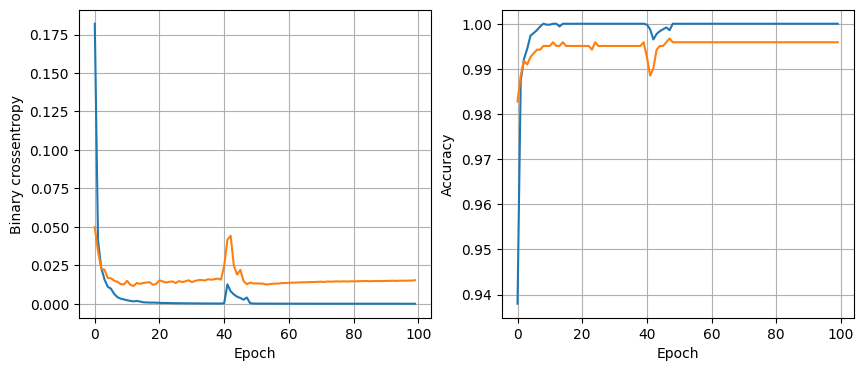

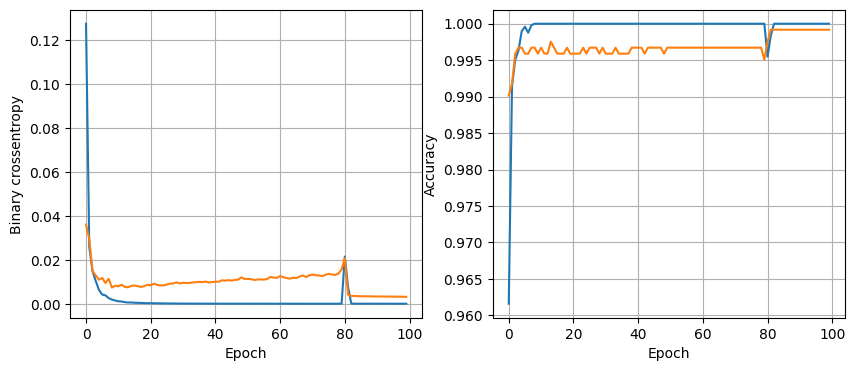

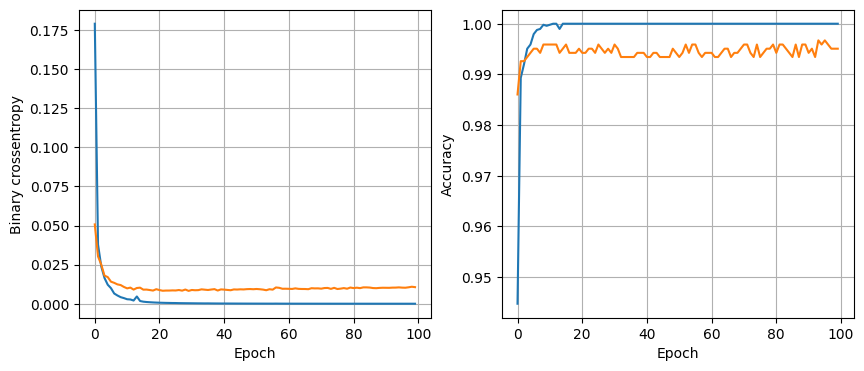

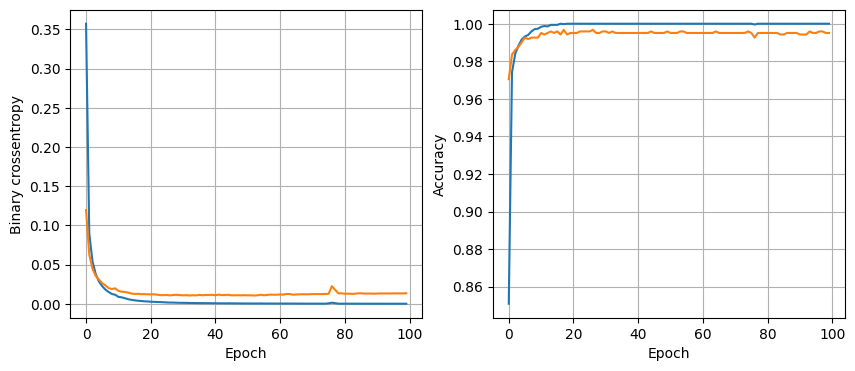

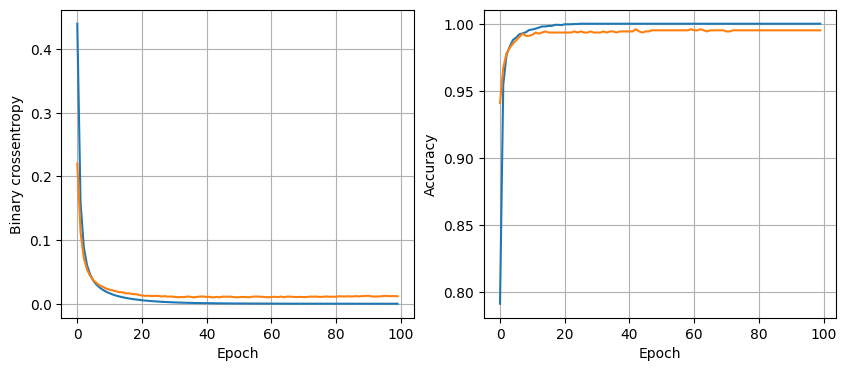

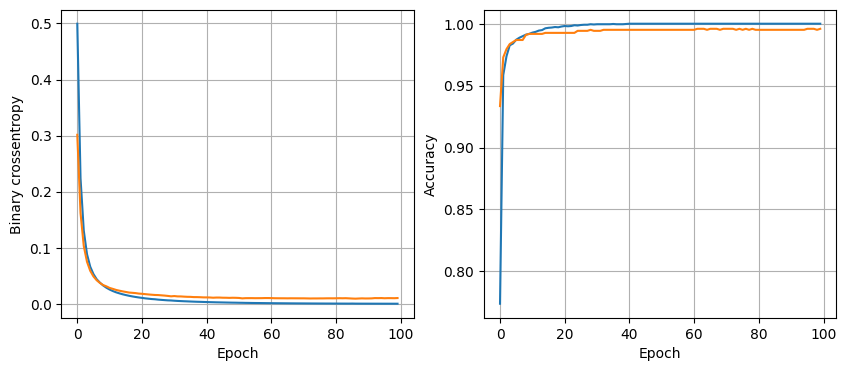

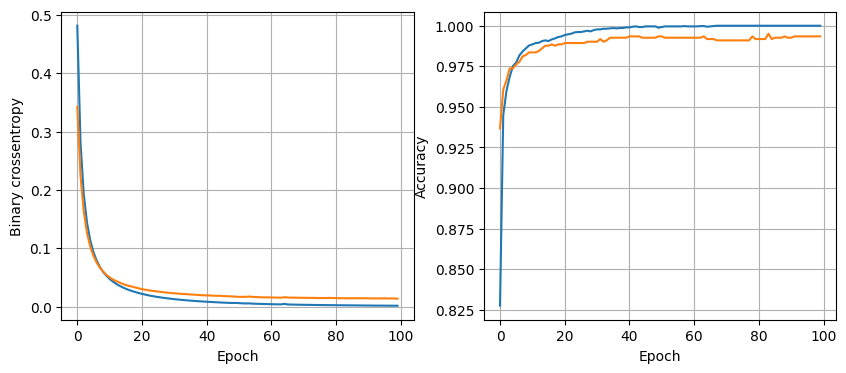

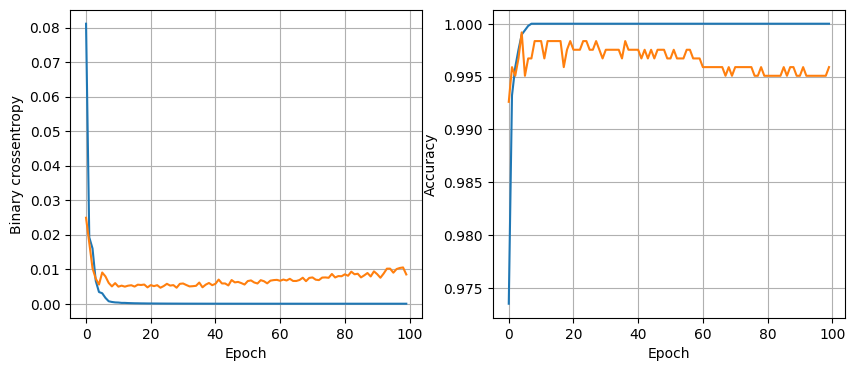

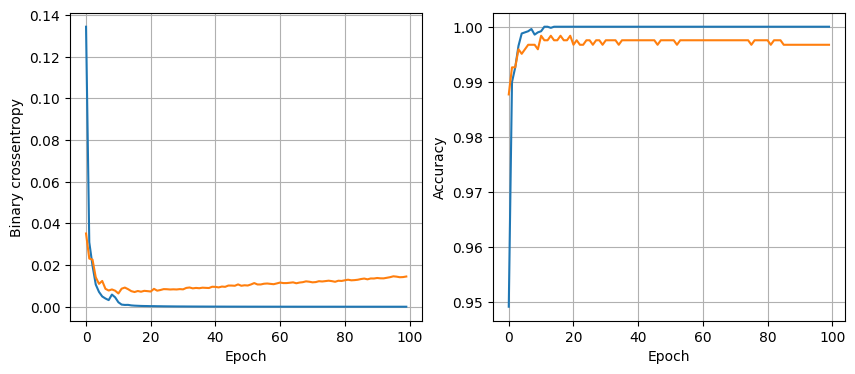

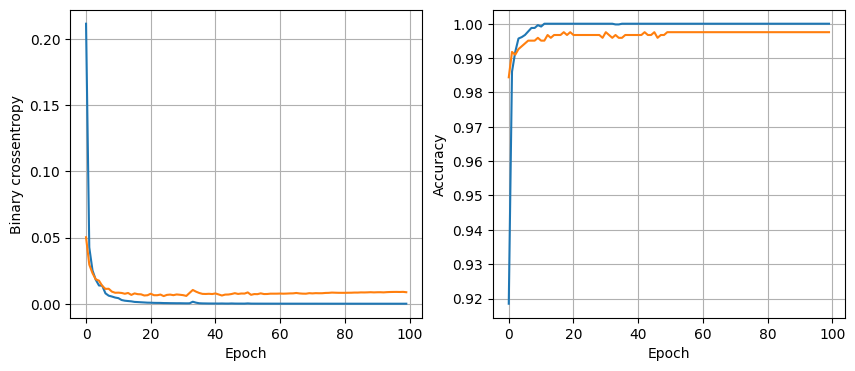

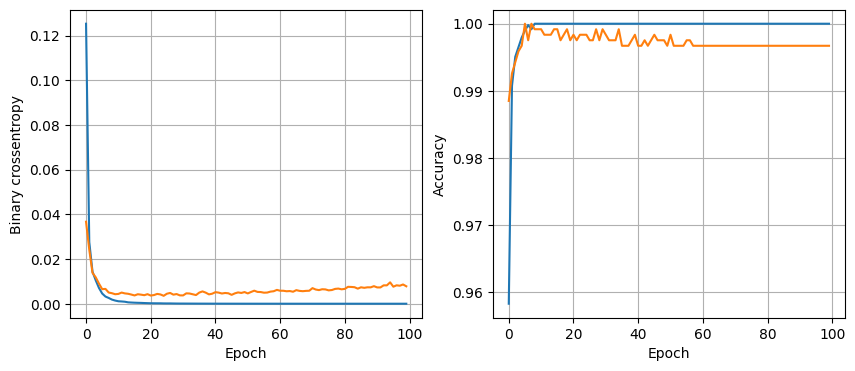

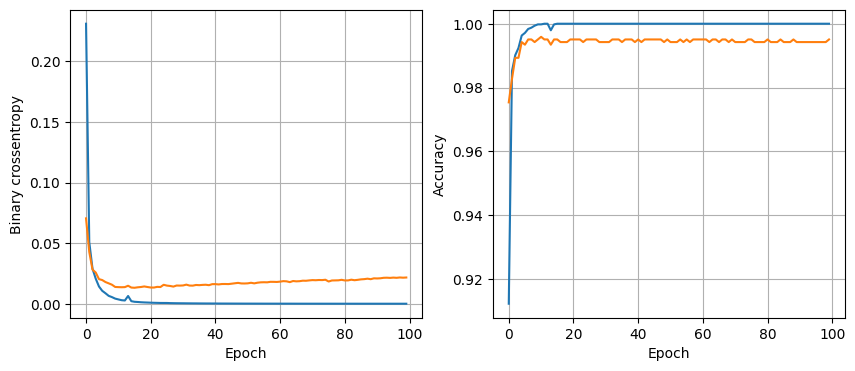

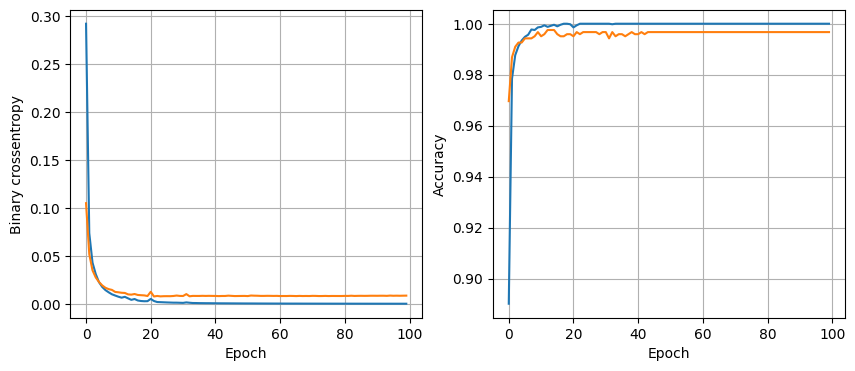

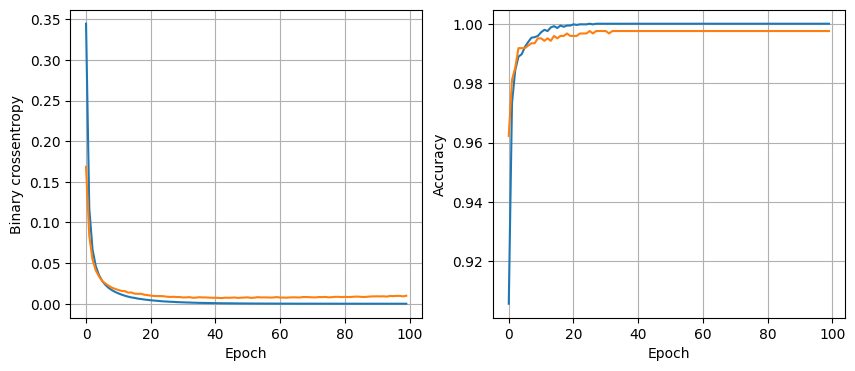

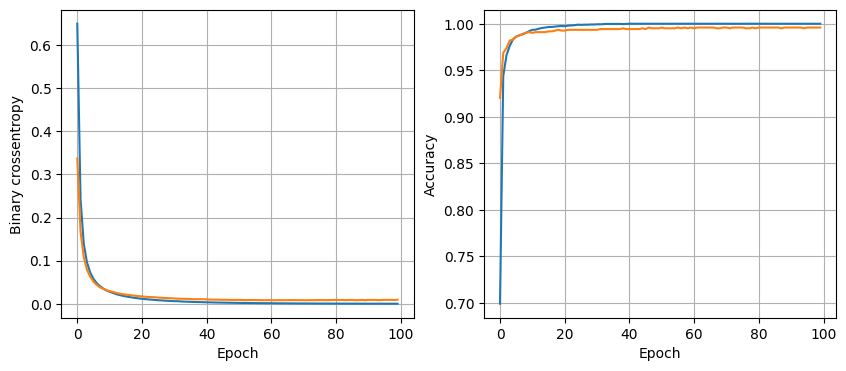

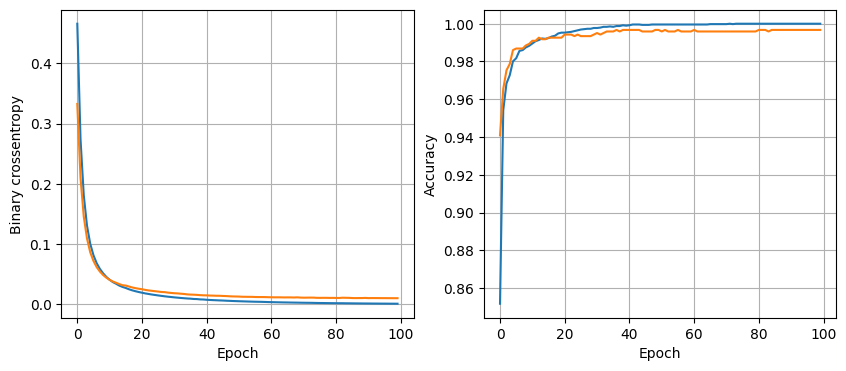

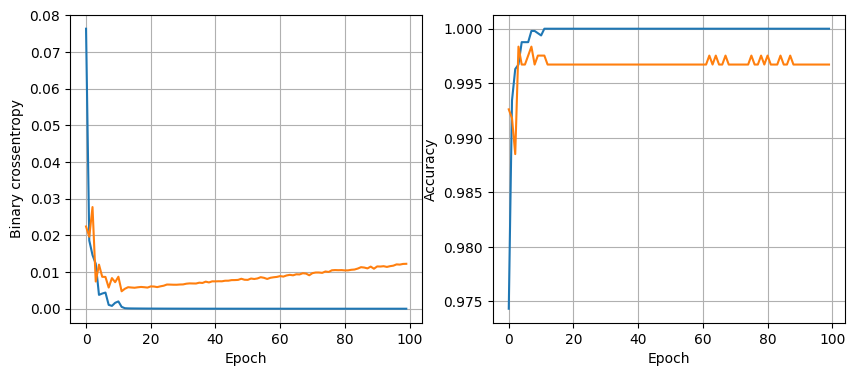

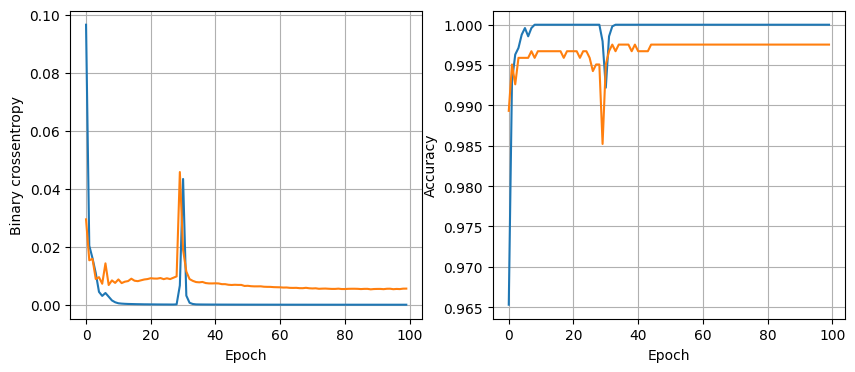

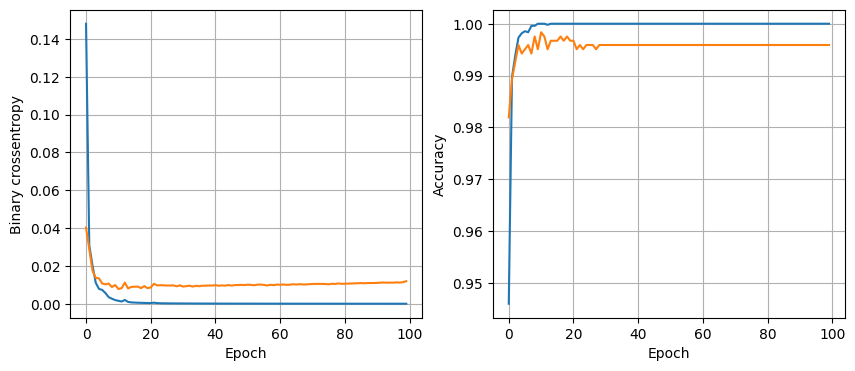

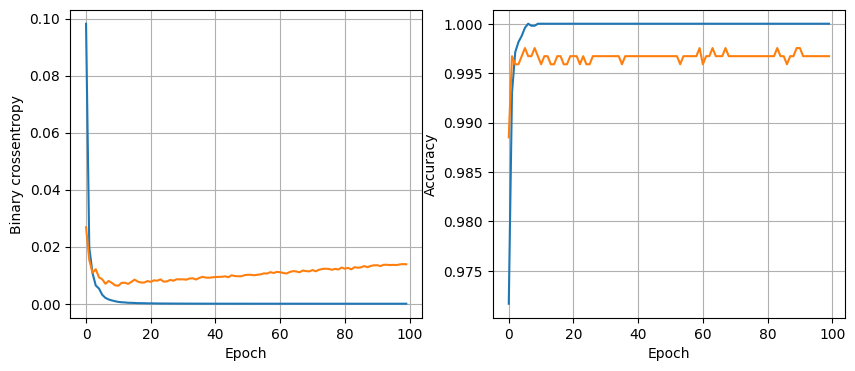

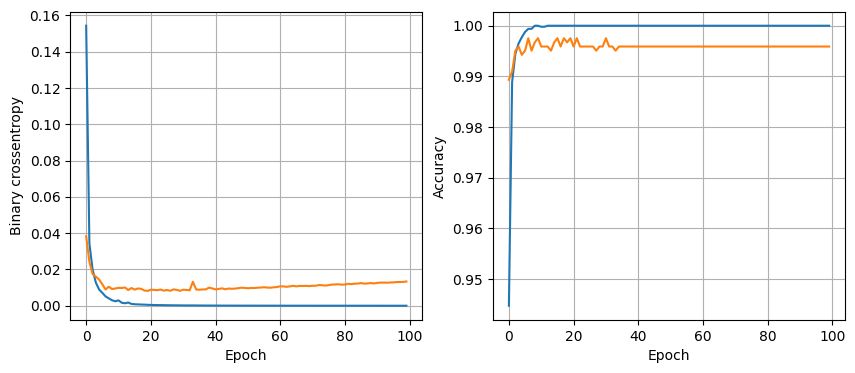

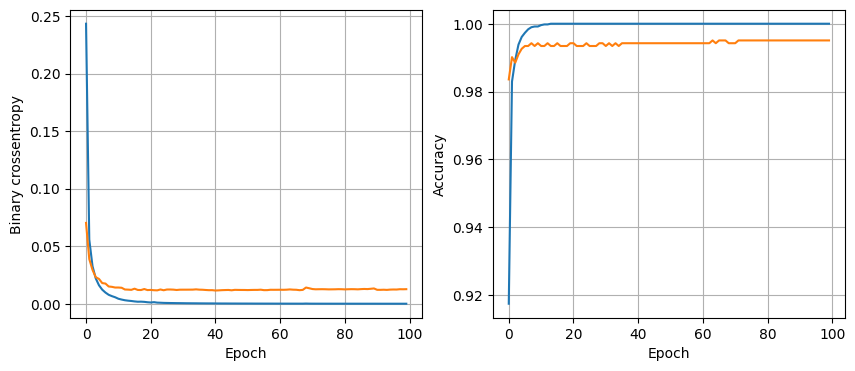

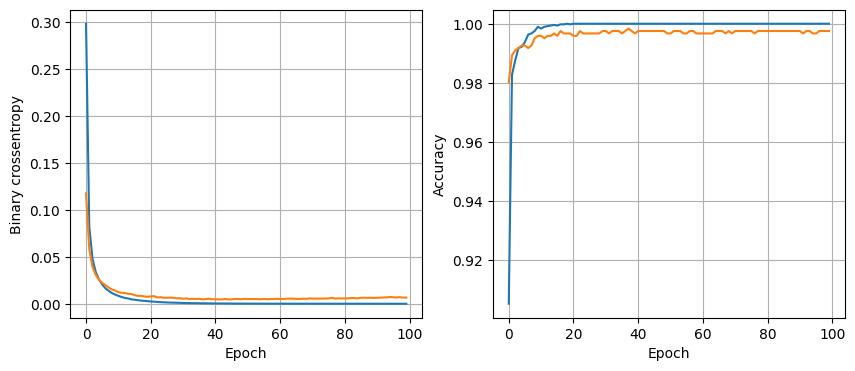

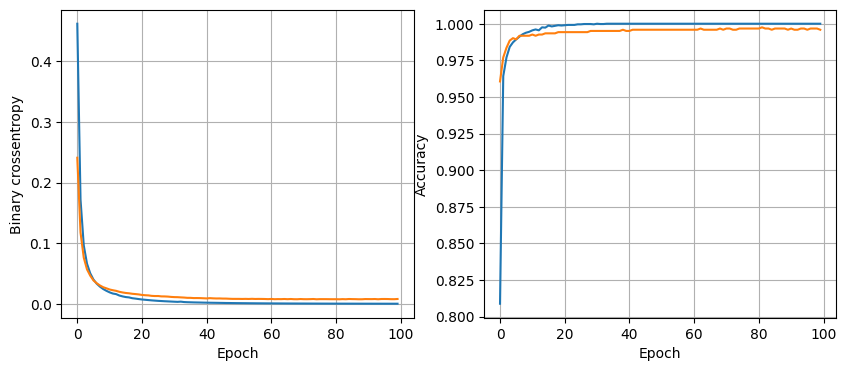

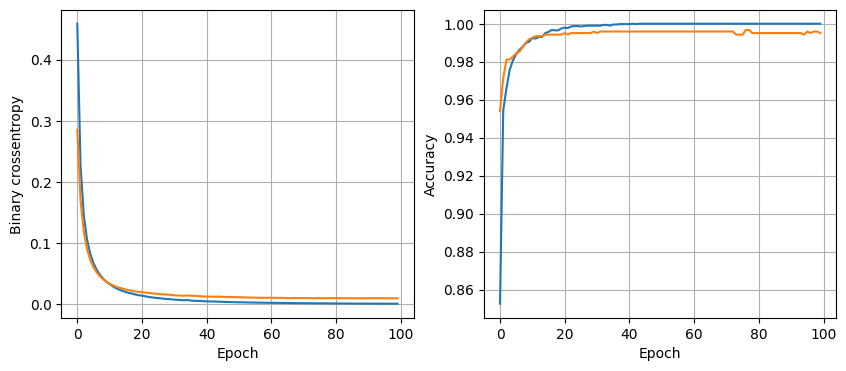

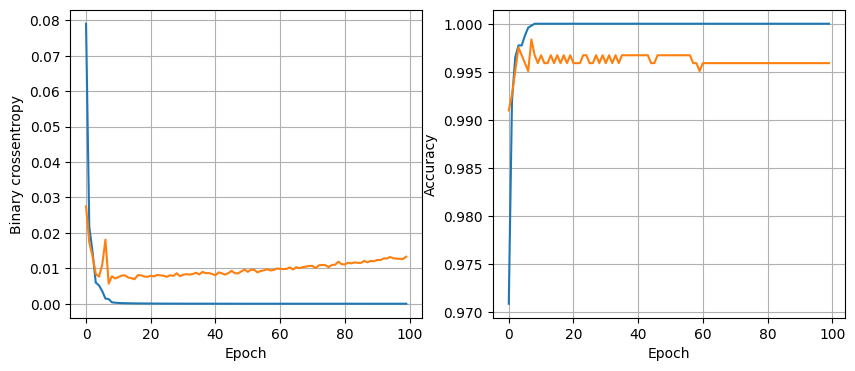

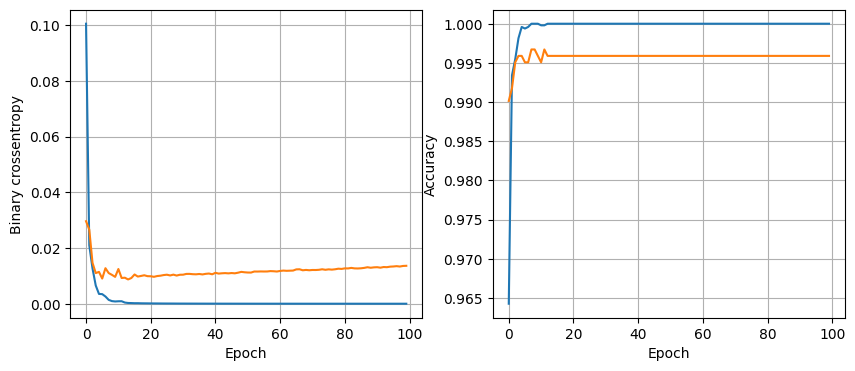

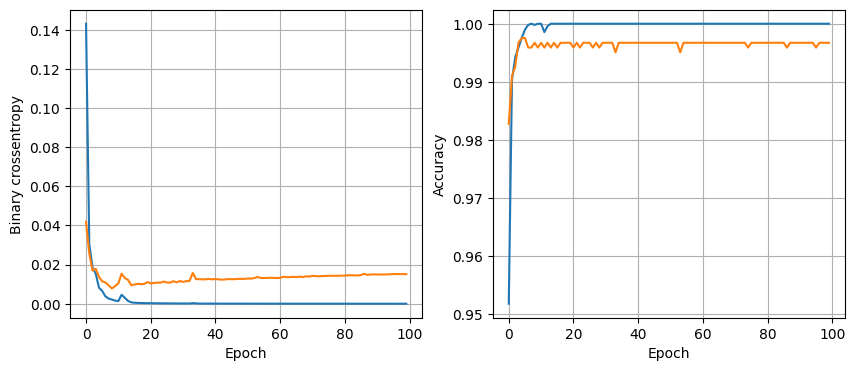

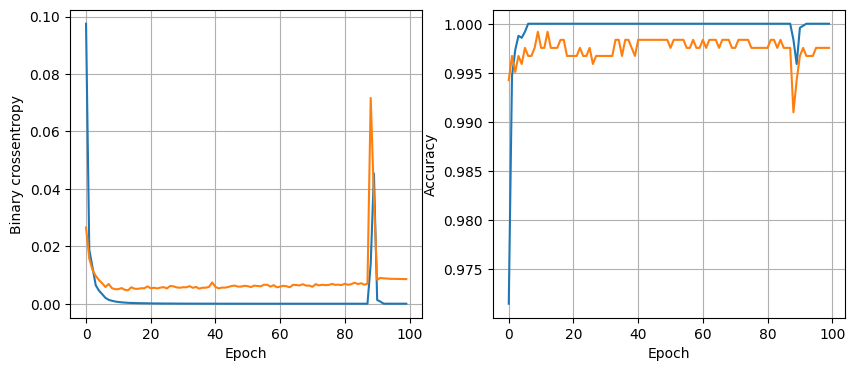

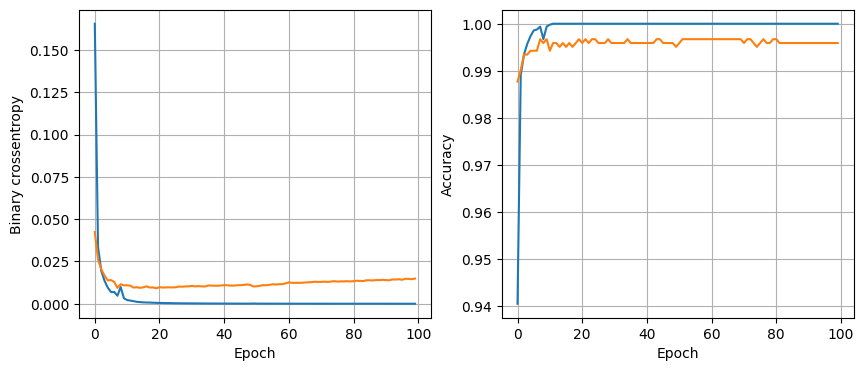

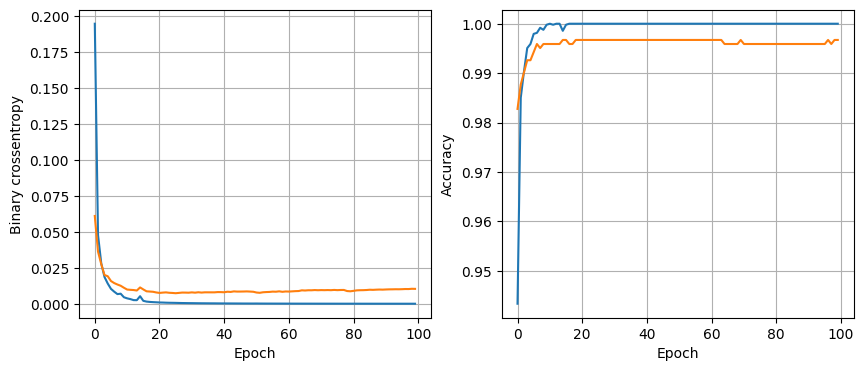

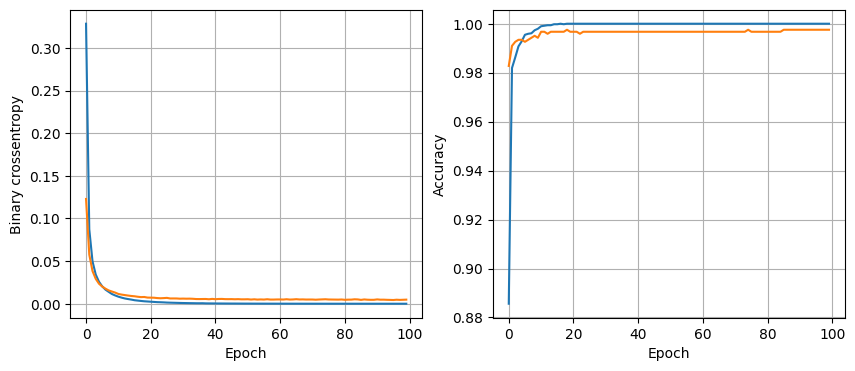

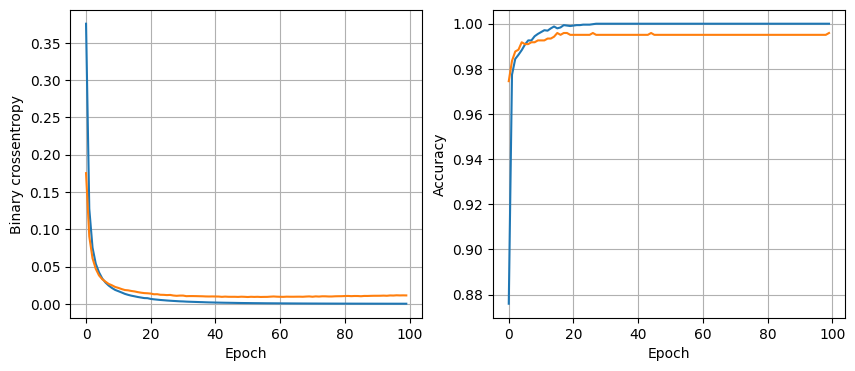

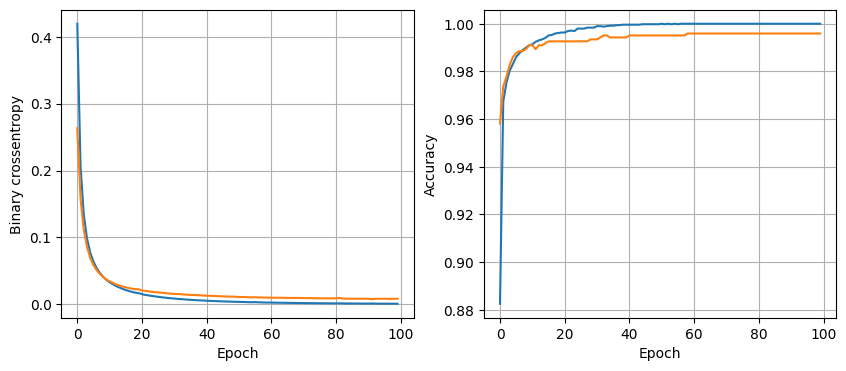

In [44]:
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(train_X_imputed, train_y, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(valid_X, valid_y)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [45]:
y_pred = model.predict(test_X_imputed) 
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

63/63 [==============================] - 0s 502us/step


In [46]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       1.00      0.99      0.99      1030

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

